
# <span style="color: blue;">Dublin & SanFrancisco Bike Data Analysis</span>  

## LIBRARIES

In [10]:
import pandas as pd #Pandas is a powerful library for data manipulation and analysis, especially for structured data in tabular form.
import numpy as np #Numpy is widely used for numerical operations and handling large multidimensional arrays and matrices.

import matplotlib.pyplot as plt #Matplotlib is a core library for creating static, interactive, and animated visualizations in Python.
import seaborn as sns #Seaborn builds on matplotlib and provides a high-level interface for drawing attractive statistical graphics.

import scipy.stats as stats #SciPy's stats module provides a wide variety of statistical functions for analysis, hypothesis testing, and probability distributions.

from sklearn.preprocessing import LabelEncoder #LabelEncoder is used for converting categorical variables into numeric form by encoding each unique category as a different integer.
from sklearn.preprocessing import scale #Scale standardizes the features by adjusting their values to ensure equal importance when used in machine learning models.
from sklearn.preprocessing import StandardScaler #StandardScaler rescales features to have zero mean and unit variance, ensuring that all features contribute equally to model performance.
from sklearn import metrics #Metrics provides various functions for evaluating the performance of machine learning models, such as accuracy and F1 score.
from sklearn.metrics import confusion_matrix #Confusion matrix helps to assess the performance of classification algorithms by showing true vs. predicted class counts.
from sklearn.metrics import precision_score #Precision score measures the accuracy of positive predictions, reflecting the proportion of true positives among all positive predictions.
from sklearn.metrics import recall_score #Recall score shows the model’s ability to correctly identify all relevant instances, focusing on positive class predictions.
from sklearn.model_selection import train_test_split #train_test_split is a method for splitting datasets into training and testing subsets for model evaluation.
from sklearn.model_selection import KFold #KFold is a cross-validation technique that splits data into K subsets to validate the model on different splits to avoid overfitting.
from sklearn.model_selection import cross_val_score #cross_val_score performs cross-validation to assess the model’s performance by training it on different data splits.
from sklearn.model_selection import GridSearchCV #GridSearchCV automates hyperparameter tuning by exhaustively searching for the best combination of parameters.
from sklearn.decomposition import PCA #PCA (Principal Component Analysis) reduces the dimensionality of the dataset, identifying the most important features.

#Machine learning algorithms libraries
from sklearn.svm import SVC #SVC (Support Vector Classifier) is a supervised machine learning algorithm used for classification tasks.
from sklearn.cluster import KMeans #KMeans is an unsupervised clustering algorithm used for grouping data into clusters based on similarity.
from sklearn.linear_model import LogisticRegression #Logistic Regression is a linear model for binary or multi-class classification tasks.
from sklearn.neighbors import KNeighborsClassifier #K-Nearest Neighbors (KNN) is a simple and intuitive classification algorithm based on feature proximity.
from sklearn.naive_bayes import GaussianNB #Gaussian Naive Bayes is a probabilistic classifier based on Bayes' theorem with the assumption that features are normally distributed.
from sklearn.tree import DecisionTreeClassifier #Decision Trees create a flowchart-like structure to make decisions based on feature values for classification tasks.
from sklearn.ensemble import RandomForestClassifier #Random Forest is an ensemble method that creates a collection of decision trees and combines their predictions to improve accuracy.
import json #The json library is used for working with data in JSON format, such as parsing or generating JSON.
import requests #The requests library allows for making HTTP requests, enabling communication with APIs and web resources.

import pprint #PrettyPrint makes the output more readable and structured, especially useful for printing complex data structures.
 
import warnings #Warnings is used to control the display of warnings that may arise during code execution.
warnings.filterwarnings("ignore") #This command suppresses warning messages to keep the output clean.


--------------------------------------------------------------------------------------------------------------------------------

## FUNCTION

In [11]:
# The following functions are defined to be used later for various tasks

def label_graph(ticksfont, x_label, y_label, title_label, fontsize):
    # This function customizes the graph's labels, ticks, and title for better readability and presentation.
    plt.xticks(fontsize=ticksfont)  # Adjust the font size of x-axis ticks.
    plt.yticks(fontsize=ticksfont)  # Adjust the font size of y-axis ticks.
    plt.xlabel(x_label, fontsize=fontsize)  # Set the label for the x-axis with the specified font size.
    plt.ylabel(y_label, fontsize=fontsize)  # Set the label for the y-axis with the specified font size.
    plt.title(title_label, fontsize=fontsize)  # Set the graph title with the specified font size.

def median(array):
    # This function calculates and prints the median of an input array (middle value of the sorted data).
    median = np.median(array)  # Compute the median using numpy's median function.
    return print("Median:", median)  # Print the computed median value.

def mean(array):
    # This function calculates and prints the mean (average) of an input array.
    mean = np.mean(array)  # Compute the mean using numpy's mean function.
    return print("Mean:", mean)  # Print the computed mean value.

def variance(array):
    # This function calculates and prints the variance (spread of data) of an input array.
    variance = np.var(array)  # Compute the variance using numpy's var function.
    return print("Variance:", variance)  # Print the computed variance value.


--------------------------------------------------------------------------------------------------------------------------------

## DATAFRAME

### SAN FRANCISCO BIKES 2020 LAST QUARTER ( OCT-NOV-DEC ) Data from API

In [12]:
# Sending a GET request to the API URL to retrieve data from the source
sf_BikeApiReq = requests.get("https://data.sfgov.org/resource/7jbp-yzp3.json").text  # Fetch data from the San Francisco bike-sharing API.

# The received text data (JSON format) is parsed into a Python dictionary
sf_BikeJson = json.loads(sf_BikeApiReq)  # Convert the JSON string into a Python dictionary for further manipulation.

# Pretty print is used to enhance the readability of the JSON data, displaying it in a structured format
pprint.pprint(sf_BikeJson)  # Output the parsed JSON data with a cleaner, more readable structure.


[{'analysis_neighborhood': 'Western Addition',
  'data_as_of': '2024-01-18T15:28:35.000',
  'data_loaded_at': '2024-01-18T15:30:44.000',
  'dock_count': '31',
  'has_kiosk': 'true',
  'objectid': '4',
  'region_id': '3',
  'shape': {'coordinates': [-122.434558868, 37.783812709], 'type': 'Point'},
  'station_id': '31',
  'station_id_domo': 'SF-G19',
  'station_latitude': '37.78381271',
  'station_longitude': '-122.43455887',
  'station_name': 'Raymond Kimbell Playground',
  'supervisor_district': '5'},
 {'analysis_neighborhood': 'Western Addition',
  'data_as_of': '2024-01-18T15:28:35.000',
  'data_loaded_at': '2024-01-18T15:30:44.000',
  'dock_count': '27',
  'has_kiosk': 'true',
  'objectid': '27',
  'region_id': '3',
  'shape': {'coordinates': [-122.439445853, 37.782404602], 'type': 'Point'},
  'station_id': '29',
  'station_id_domo': 'SF-H18',
  'station_latitude': '37.7824046',
  'station_longitude': '-122.43944585',
  'station_name': "O'Farrell St at Divisadero St",
  'supervisor_

In [13]:
# Converting the JSON data (Python dictionary) into a pandas DataFrame for structured analysis and manipulation
sf_BikeJsonDF = pd.DataFrame.from_dict(sf_BikeJson)  # Convert the JSON data into a DataFrame for easier access and handling of tabular data.

# we can print the DataFrame using pprint to display it in a more readable format (commented out here)
pprint.pprint(sf_BikeJsonDF)  # Uncomment this line to view the DataFrame with improved readability.




    objectid station_id                            station_name  \
0          4         31              Raymond Kimbell Playground   
1         27         29           O'Farrell St at Divisadero St   
2         36         39             Scott St at Golden Gate Ave   
3         41         54  Alamo Square (Steiner St at Fulton St)   
4        217        285              Webster St at O'Farrell St   
..       ...        ...                                     ...   
467      411        475                   22nd St at William St   
468      417        495                   St James St at 9th St   
469      419        494             Park Ave at Laurel Grove Ln   
470      961        546                   13th St at Webster St   
471      349        421                    23rd St at Taylor St   

    station_id_domo has_kiosk dock_count    station_latitude  \
0            SF-G19      true         31         37.78381271   
1            SF-H18      true         27          37.7824046   
2  

In [14]:
# Display the DataFrame to inspect its contents (this would display the DataFrame in an interactive environment like Jupyter)
sf_BikeJsonDF  # Uncomment this line to display the DataFrame.

,objectid,station_id,station_name,station_id_domo,has_kiosk,dock_count,station_latitude,station_longitude,region_id,shape,supervisor_district,analysis_neighborhood,data_loaded_at,data_as_of
0,4,31,Raymond Kimbell Playground,SF-G19,true,31,37.78381271,-122.43455887,3,"{'type': 'Point', 'coordinates': [-122.4345588...",5,Western Addition,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
1,27,29,O'Farrell St at Divisadero St,SF-H18,true,27,37.7824046,-122.43944585,3,"{'type': 'Point', 'coordinates': [-122.4394458...",5,Western Addition,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
2,36,39,Scott St at Golden Gate Ave,SF-I19,true,27,37.778999400000004,-122.4368608,3,"{'type': 'Point', 'coordinates': [-122.4368608...",5,Western Addition,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
3,41,54,Alamo Square (Steiner St at Fulton St),SF-J19,true,23,37.77754677,-122.43327409,3,"{'type': 'Point', 'coordinates': [-122.4332740...",5,Western Addition,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
4,217,285,Webster St at O'Farrell St,SF-H20,true,27,37.78352084,-122.43115783,3,"{'type': 'Point', 'coordinates': [-122.4311578...",5,Western Addition,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,411,475,22nd St at William St,SJ-N14,true,15,37.34037874,-121.86402082,5,"{'type': 'Point', 'coordinates': [-121.8640208...",NaN,NaN,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
468,417,495,St James St at 9th St,SJ-L11,true,19,37.34320849,-121.88438952,5,"{'type': 'Point', 'coordinates': [-121.8843895...",NaN,NaN,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
469,419,494,Park Ave at Laurel Grove Ln,SJ-M6-2,true,19,37.32628232,-121.9049111,5,"{'type': 'Point', 'coordinates': [-121.9049111...",NaN,NaN,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
470,961,546,13th St at Webster St,OK-L6-2,true,19,37.8026884,-122.26914637,NaN,"{'type': 'Point', 'coordinates': [-122.2691463...",NaN,NaN,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000


In [15]:
#First 5 (default) lines viewed
sf_BikeJsonDF.head(5)

,objectid,station_id,station_name,station_id_domo,has_kiosk,dock_count,station_latitude,station_longitude,region_id,shape,supervisor_district,analysis_neighborhood,data_loaded_at,data_as_of
0,4,31,Raymond Kimbell Playground,SF-G19,true,31,37.78381271,-122.43455887,3,"{'type': 'Point', 'coordinates': [-122.4345588...",5,Western Addition,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
1,27,29,O'Farrell St at Divisadero St,SF-H18,true,27,37.7824046,-122.43944585,3,"{'type': 'Point', 'coordinates': [-122.4394458...",5,Western Addition,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
2,36,39,Scott St at Golden Gate Ave,SF-I19,true,27,37.778999400000004,-122.4368608,3,"{'type': 'Point', 'coordinates': [-122.4368608...",5,Western Addition,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
3,41,54,Alamo Square (Steiner St at Fulton St),SF-J19,true,23,37.77754677,-122.43327409,3,"{'type': 'Point', 'coordinates': [-122.4332740...",5,Western Addition,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
4,217,285,Webster St at O'Farrell St,SF-H20,true,27,37.78352084,-122.43115783,3,"{'type': 'Point', 'coordinates': [-122.4311578...",5,Western Addition,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000


In [16]:
#Total number of columns and rows were checked
sf_BikeJsonDF.shape

(472, 14)

In [17]:
#Last 5 (default) lines viewed
sf_BikeJsonDF.tail(5)

,objectid,station_id,station_name,station_id_domo,has_kiosk,dock_count,station_latitude,station_longitude,region_id,shape,supervisor_district,analysis_neighborhood,data_loaded_at,data_as_of
467,411,475,22nd St at William St,SJ-N14,true,15,37.34037874,-121.86402082,5,"{'type': 'Point', 'coordinates': [-121.8640208...",NaN,NaN,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
468,417,495,St James St at 9th St,SJ-L11,true,19,37.34320849,-121.88438952,5,"{'type': 'Point', 'coordinates': [-121.8843895...",NaN,NaN,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
469,419,494,Park Ave at Laurel Grove Ln,SJ-M6-2,true,19,37.32628232,-121.9049111,5,"{'type': 'Point', 'coordinates': [-121.9049111...",NaN,NaN,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
470,961,546,13th St at Webster St,OK-L6-2,true,19,37.8026884,-122.26914637,NaN,"{'type': 'Point', 'coordinates': [-122.2691463...",NaN,NaN,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
471,349,421,23rd St at Taylor St,SJ-I14,true,19,37.36000139,-121.87877834,5,"{'type': 'Point', 'coordinates': [-121.8787783...",NaN,NaN,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000


In [18]:
#The names of the columns were learned
sf_BikeJsonDF.columns

Index(['objectid', 'station_id', 'station_name', 'station_id_domo',
       'has_kiosk', 'dock_count', 'station_latitude', 'station_longitude',
       'region_id', 'shape', 'supervisor_district', 'analysis_neighborhood',
       'data_loaded_at', 'data_as_of'],
      dtype='object')

--------------------------------------------------------------------------------------------------------------------------------

### SAN FRANCISCO BIKES 2020 LAST QUARTER ( OCT-NOV-DEC ) Data from CSV

In [19]:
# Loading the CSV data files for October, November, and December 2020 into separate DataFrames
sanbikeoct = pd.read_csv('202010-baywheels-tripdata.csv')  # The trip data for October 2020 is read into the 'sanbikeoct' DataFrame.
sanbikenov = pd.read_csv('202011-baywheels-tripdata.csv')  # The trip data for November 2020 is read into the 'sanbikenov' DataFrame.
sanbikedec = pd.read_csv('202012-baywheels-tripdata.csv')  # The trip data for December 2020 is read into the 'sanbikedec' DataFrame.

# Combining the DataFrames from October, November, and December into a single DataFrame using concatenation
sf_BikeDF = pd.concat([sanbikeoct, sanbikenov, sanbikedec])

# Resetting the index of the combined DataFrame to ensure it starts from 0 and has sequential values
sf_BikeDF.reset_index(drop=True, inplace=True)

# Optionally, pprint can be used to display the DataFrame in a more readable format (commented out here)
# pprint.pprint(sf_BikeDF)  # Uncomment to display the combined DataFrame.

# Display the combined DataFrame with trip data for the three months
sf_BikeDF  # This outputs the concatenated DataFrame.


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,DAFE69F6EA89E3DC,electric_bike,2020-10-31 13:50:15,2020-10-31 14:02:15,NaN,NaN,NaN,NaN,37.340000,-121.890000,37.330000,-121.870000,casual
1,AD09094F86C45E90,electric_bike,2020-10-30 21:18:18,2020-10-30 21:27:47,NaN,NaN,NaN,NaN,37.760000,-122.420000,37.750000,-122.400000,casual
2,9ED766B44303995B,electric_bike,2020-10-31 16:55:01,2020-10-31 17:02:27,NaN,NaN,NaN,NaN,37.800000,-122.430000,37.800000,-122.440000,casual
3,AB7B66F7E79EADB2,electric_bike,2020-10-30 21:57:57,2020-10-30 22:28:22,NaN,NaN,NaN,NaN,37.730000,-122.400000,37.730000,-122.410000,casual
4,C7912C959C4399C4,electric_bike,2020-10-30 17:10:26,2020-10-30 17:16:04,NaN,NaN,NaN,NaN,37.760000,-122.430000,37.770000,-122.430000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406978,6CB07C6AFE6561BC,electric_bike,2020-12-28 07:19:19,2020-12-28 07:28:41,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.766976,-122.390798,37.740510,-122.376471,casual
406979,6EFCB11613F61FBC,electric_bike,2020-12-29 07:19:53,2020-12-29 07:31:16,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.766948,-122.390778,37.740531,-122.376482,casual
406980,D4DF4BFB58FF4834,electric_bike,2020-12-31 07:18:31,2020-12-31 07:28:16,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.766953,-122.390764,37.740469,-122.376532,casual
406981,BE4C1C553CD05D78,electric_bike,2020-12-18 07:11:10,2020-12-18 07:22:28,4th St at 16th St,SF-M30,Heron's Head Park,SF-V32,37.767099,-122.391054,37.740519,-122.376478,casual


In [20]:
# Using the shape function to check the dimensions of the merged DataFrame (number of rows and columns)
sf_BikeDF.shape  # Outputs a tuple representing the number of rows and columns in the combined DataFrame.


(406983, 13)

In [21]:
#First 5 (default) lines viewed
sf_BikeDF.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,DAFE69F6EA89E3DC,electric_bike,2020-10-31 13:50:15,2020-10-31 14:02:15,NaN,NaN,NaN,NaN,37.34,-121.89,37.33,-121.87,casual
1,AD09094F86C45E90,electric_bike,2020-10-30 21:18:18,2020-10-30 21:27:47,NaN,NaN,NaN,NaN,37.76,-122.42,37.75,-122.40,casual
2,9ED766B44303995B,electric_bike,2020-10-31 16:55:01,2020-10-31 17:02:27,NaN,NaN,NaN,NaN,37.80,-122.43,37.80,-122.44,casual
3,AB7B66F7E79EADB2,electric_bike,2020-10-30 21:57:57,2020-10-30 22:28:22,NaN,NaN,NaN,NaN,37.73,-122.40,37.73,-122.41,casual
4,C7912C959C4399C4,electric_bike,2020-10-30 17:10:26,2020-10-30 17:16:04,NaN,NaN,NaN,NaN,37.76,-122.43,37.77,-122.43,casual


In [22]:
#The names of the columns were learned
sf_BikeDF.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [23]:
sf_BikeDF.describe() #Dataset is examined

,start_lat,start_lng,end_lat,end_lng
count,406983.000000,406983.000000,406571.000000,406571.000000
mean,37.734748,-122.360335,37.734790,-122.360247
std,0.135327,0.163213,0.135348,0.163174
min,37.260000,-122.511322,37.240000,-122.520000
25%,37.761088,-122.431116,37.761091,-122.430000
50%,37.774255,-122.412084,37.774375,-122.411845
75%,37.787333,-122.394191,37.787933,-122.394148
max,38.050000,-121.810000,38.050000,-121.800000


In [24]:
# To reduce the dataset size, we randomly sample 50,000 rows from the DataFrame. 
# This is done to manage large datasets while maintaining data variety by shuffling the rows.
sf_BikeDF = sf_BikeDF.sample(n=50000)  # Randomly selects 50,000 rows from the DataFrame to work with a manageable subset of the data.


In [25]:
# Converting the 'started_at' and 'ended_at' columns to datetime format for easier manipulation
sf_BikeDF["started_at"] = pd.to_datetime(sf_BikeDF["started_at"])  # Convert 'started_at' column to datetime type.
sf_BikeDF["started_date"] = sf_BikeDF['started_at'].dt.date  # Extract the date part of 'started_at' and store it in 'started_date'.
sf_BikeDF["started_time"] = sf_BikeDF['started_at'].dt.time  # Extract the time part of 'started_at' and store it in 'started_time'.

sf_BikeDF["ended_at"] = pd.to_datetime(sf_BikeDF["ended_at"])  # Convert 'ended_at' column to datetime type.
sf_BikeDF["ended_date"] = sf_BikeDF['ended_at'].dt.date  # Extract the date part of 'ended_at' and store it in 'ended_date'.
sf_BikeDF["ended_time"] = sf_BikeDF['ended_at'].dt.time  # Extract the time part of 'ended_at' and store it in 'ended_time'.


In [26]:
# Remove unnecessary columns that will not be used in the analysis
sf_BikeDF = sf_BikeDF.drop(columns=["start_lat", "start_lng", "end_lat", "end_lng", "started_at", "ended_at"])
sf_BikeDF.columns


Index(['ride_id', 'rideable_type', 'start_station_name', 'start_station_id',
       'end_station_name', 'end_station_id', 'member_casual', 'started_date',
       'started_time', 'ended_date', 'ended_time'],
      dtype='object')

In [27]:
# Check the data types of each column in the dataset
sf_BikeDF.dtypes

ride_id               object
rideable_type         object
start_station_name    object
start_station_id      object
end_station_name      object
end_station_id        object
member_casual         object
started_date          object
started_time          object
ended_date            object
ended_time            object
dtype: object

In [28]:
# Verify the total number of rows and columns in the dataset
sf_BikeDF.shape


(50000, 11)

In [29]:
# Determine the number of non-missing elements in each column
sf_BikeDF.count()


ride_id               50000
rideable_type         50000
start_station_name    36816
start_station_id      36816
end_station_name      35869
end_station_id        35869
member_casual         50000
started_date          50000
started_time          50000
ended_date            50000
ended_time            50000
dtype: int64

In [30]:
# Obtain detailed information about the dataset, including column types and non-null counts
sf_BikeDF.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 226071 to 137606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ride_id             50000 non-null  object
 1   rideable_type       50000 non-null  object
 2   start_station_name  36816 non-null  object
 3   start_station_id    36816 non-null  object
 4   end_station_name    35869 non-null  object
 5   end_station_id      35869 non-null  object
 6   member_casual       50000 non-null  object
 7   started_date        50000 non-null  object
 8   started_time        50000 non-null  object
 9   ended_date          50000 non-null  object
 10  ended_time          50000 non-null  object
dtypes: object(11)
memory usage: 4.6+ MB


In [31]:
#Last 5 (default) lines viewed
sf_BikeDF.tail()

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,started_date,started_time,ended_date,ended_time
250579,A8FFA2FDC7215204,docked_bike,Bryant St at 2nd St,SF I29-1,Townsend St at 6th St,SF-K28-3,casual,2020-11-02,09:46:42,2020-11-02,09:54:27
97824,36374CFBFBC9936E,docked_bike,Eureka Valley Recreation Center,SF-O18,Mission Playground,SF-O22,member,2020-10-01,18:19:12,2020-10-01,18:27:36
210366,F4B9D9279071F03D,electric_bike,17th St at Valencia St,SF-N22-2,Garfield Square (25th St at Harrison St),SF-R24,casual,2020-11-10,21:19:22,2020-11-10,21:27:39
125520,83B0F8F02534DAC7,electric_bike,Salesforce Transit Center (Natoma St at 2nd St),SF-G29-1,The Embarcadero at Steuart St,SF-F30-1,member,2020-10-16,07:59:02,2020-10-16,08:03:37
137606,16CE536893980F96,docked_bike,4th St at Mission Bay Blvd S,SF-L30-1,4th St at Mission Bay Blvd S,SF-L30-1,casual,2020-10-05,17:41:04,2020-10-05,17:41:51


In [32]:
# Identify columns with missing values and count the number of null entries in each
sf_BikeDF.isnull().sum()


ride_id                   0
rideable_type             0
start_station_name    13184
start_station_id      13184
end_station_name      14131
end_station_id        14131
member_casual             0
started_date              0
started_time              0
ended_date                0
ended_time                0
dtype: int64

In [33]:
# Ignore rows with NaN values in specific columns (optional approach)
# sf_BikeDF[sf_BikeDF[["start_station_name", "start_station_id", "end_station_name", "end_station_id"]].notna()]

# Remove rows with any NaN values from the dataset
sf_BikeDF.dropna(inplace=True)


In [34]:
# Verify again to ensure there are no remaining NaN values in the dataset
sf_BikeDF.isnull().sum()


ride_id               0
rideable_type         0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
started_date          0
started_time          0
ended_date            0
ended_time            0
dtype: int64

In [35]:
# Generate descriptive statistics for the dataset using the describe function
print(sf_BikeDF['ride_id'].describe())
print("----------")
print(sf_BikeDF['rideable_type'].describe())
print("----------")
print(sf_BikeDF['start_station_name'].describe())
print("----------")
print(sf_BikeDF['start_station_id'].describe())
print("----------")
print(sf_BikeDF['end_station_name'].describe())
print("----------")
print(sf_BikeDF['end_station_id'].describe())
print("----------")
print(sf_BikeDF['member_casual'].describe())
print("----------")
print(sf_BikeDF['started_date'].describe())
print("----------")
print(sf_BikeDF['started_time'].describe())
print("----------")
print(sf_BikeDF['ended_date'].describe())
print("----------")
print(sf_BikeDF['ended_time'].describe())

count                30658
unique               30658
top       8C22DF819975690C
freq                     1
Name: ride_id, dtype: object
----------
count             30658
unique                3
top       electric_bike
freq              16092
Name: rideable_type, dtype: object
----------
count                    30658
unique                     462
top       Market St at 10th St
freq                       557
Name: start_station_name, dtype: object
----------
count        30658
unique         459
top       SF-J23-1
freq           557
Name: start_station_id, dtype: object
----------
count                    30658
unique                     464
top       Market St at 10th St
freq                       523
Name: end_station_name, dtype: object
----------
count        30658
unique         461
top       SF-J23-1
freq           523
Name: end_station_id, dtype: object
----------
count      30658
unique         2
top       casual
freq       15343
Name: member_casual, dtype: object
----------


In [36]:
# Retrieve unique values from the columns using the unique function
print(sf_BikeDF['ride_id'].unique())
print("----------")
print(sf_BikeDF['rideable_type'].unique())
print("----------")
print(sf_BikeDF['start_station_name'].unique())
print("----------")
print(sf_BikeDF['start_station_id'].unique())
print("----------")
print(sf_BikeDF['end_station_name'].unique())
print("----------")
print(sf_BikeDF['end_station_id'].unique())
print("----------")
print(sf_BikeDF['member_casual'].unique())
print("----------")
print(sf_BikeDF['started_date'].unique())
print("----------")
print(sf_BikeDF['started_time'].unique())
print("----------")
print(sf_BikeDF['ended_date'].unique())
print("----------")
print(sf_BikeDF['ended_time'].unique())

['8C22DF819975690C' '948FDEC3A9BC8303' '07A004FBEAFF74A0' ...
 'F4B9D9279071F03D' '83B0F8F02534DAC7' '16CE536893980F96']
----------
['electric_bike' 'docked_bike' 'classic_bike']
----------
['Raymond Kimbell Playground' 'Washington St at Kearny St'
 'Alameda St at Henry Adams St' 'Cruise Terminal at Pier 27'
 '48th Ave at Cabrillo St' 'University Ave at Oxford St'
 'Union Square (Powell St at Post St)' 'Funston Ave at Fulton St'
 'McAllister St at Arguello Blvd' 'Jackson St at Polk St'
 'Division St at Potrero Ave' 'The Embarcadero at Bryant St'
 'Powell St BART Station (Market St at 5th St)' 'Parker St at Fulton St'
 'Fulton St at Laguna St' '24th St at Chattanooga St'
 'Davis St at Jackson St' 'Victoria Manalo Draves Park'
 'Spruce St at California St' 'McCoppin St at Valencia St'
 '7th Ave at Cabrillo St' 'S Park St at 3rd St'
 '4th St at Mission Bay Blvd S' '9th Ave at Geary Blvd'
 'Parker Ave at McAllister St' 'Hubbell St at 16th St' 'Esprit Park'
 'Precita Park' 'San Francisco Ca

### DUBLIN BIKES 2020 LAST QUARTER ( OCT-NOV-DEC ) Data from CSV

In [37]:
#The file to be processed is assigned to the variable
dublinoct = r"C:\Users\HP\Desktop\LAST BASH"
dublinnov = r"C:\Users\HP\Desktop\LAST BASH"
dublindec = r"C:\Users\HP\Desktop\LAST BASH"
#Csv files read
dublinoct=pd.read_csv('moby-bikes-historical-data-102020.csv') #data is read .
dublinnov=pd.read_csv('moby-bikes-historical-data-112020.csv') #data is read .
dublindec=pd.read_csv('moby-bikes-historical-data-122020.csv') #data is read .
#Dataframes created and merged with concat
dub_BikeDF = pd.concat([dublinoct, dublinnov, dublindec ])
#Index values have been reset
dub_BikeDF.reset_index(drop=True, inplace=True)
#pprint.pprint(dub_BikeDF)
dub_BikeDF


,HarvestTime,BikeID,Battery,BikeIdentifier,BikeTypeName,EBikeProfileID,EBikeStateID,IsEBike,IsMotor,IsSmartLock,LastGPSTime,LastRentalStart,Latitude,Longitude,SpikeID
0,2020-10-01 00:00:05,5,86.0,1,DUB-General,1,2,True,False,False,2020-10-01 00:34:26,2020-09-30 12:31:15,53.2945,-6.13443,1
1,2020-10-01 00:00:05,6,75.0,2,DUB-General,1,2,True,False,False,2020-10-01 00:51:12,2020-09-28 18:13:27,53.3413,-6.28366,2
2,2020-10-01 00:00:05,7,50.0,3,DUB-General,1,2,True,False,False,2020-10-01 00:36:54,2020-09-30 18:46:51,53.3763,-6.27195,3
3,2020-10-01 00:00:05,8,33.0,4,DUB-General,1,2,True,False,False,2020-10-01 00:41:43,2020-09-27 14:31:37,53.3254,-6.25507,4
4,2020-10-01 00:00:05,9,67.0,5,DUB-General,1,2,True,False,False,2020-10-01 00:46:55,2020-09-30 21:39:20,53.3654,-6.27161,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363414,2020-12-31 00:30:02,120,74.0,101,DUB-General,1,2,True,False,False,2020-12-31 00:24:35,2020-12-26 14:30:19,53.3429,-6.23872,101
363415,2020-12-31 00:30:02,121,47.0,103,DUB-General,1,2,True,False,False,2020-12-31 00:29:49,2020-12-30 14:19:48,53.3382,-6.22251,103
363416,2020-12-31 00:30:02,122,58.0,115,DUB-General,1,2,True,False,False,2020-12-31 00:06:29,2020-12-30 15:45:02,53.3439,-6.26116,115
363417,2020-12-31 00:30:02,123,77.0,119,DUB-General,1,2,True,False,False,2020-12-31 00:22:22,2020-12-29 11:59:38,53.3091,-6.21641,119


In [38]:
#First 10 (default) lines viewed
dub_BikeDF.head(10)

,HarvestTime,BikeID,Battery,BikeIdentifier,BikeTypeName,EBikeProfileID,EBikeStateID,IsEBike,IsMotor,IsSmartLock,LastGPSTime,LastRentalStart,Latitude,Longitude,SpikeID
0,2020-10-01 00:00:05,5,86.0,1,DUB-General,1,2,True,False,False,2020-10-01 00:34:26,2020-09-30 12:31:15,53.2945,-6.13443,1
1,2020-10-01 00:00:05,6,75.0,2,DUB-General,1,2,True,False,False,2020-10-01 00:51:12,2020-09-28 18:13:27,53.3413,-6.28366,2
2,2020-10-01 00:00:05,7,50.0,3,DUB-General,1,2,True,False,False,2020-10-01 00:36:54,2020-09-30 18:46:51,53.3763,-6.27195,3
3,2020-10-01 00:00:05,8,33.0,4,DUB-General,1,2,True,False,False,2020-10-01 00:41:43,2020-09-27 14:31:37,53.3254,-6.25507,4
4,2020-10-01 00:00:05,9,67.0,5,DUB-General,1,2,True,False,False,2020-10-01 00:46:55,2020-09-30 21:39:20,53.3654,-6.27161,5
5,2020-10-01 00:00:05,11,84.0,7,DUB-General,1,2,True,False,False,2020-10-01 00:44:36,2020-09-29 19:41:36,53.3665,-6.31908,7
6,2020-10-01 00:00:05,12,85.0,8,DUB-General,1,2,True,False,False,2020-10-01 00:46:29,2020-09-29 20:03:38,53.3697,-6.34877,8
7,2020-10-01 00:00:05,14,83.0,11,DUB-General,1,2,True,False,False,2020-10-01 00:57:52,2020-09-29 20:56:00,53.3346,-6.27462,11
8,2020-10-01 00:00:05,15,80.0,13,DUB-General,1,2,True,False,False,2020-10-01 00:46:35,2020-09-30 19:41:24,53.3019,-6.17814,13
9,2020-10-01 00:00:05,16,47.0,14,DUB-General,1,2,True,False,False,2020-10-01 00:56:20,2020-09-30 20:19:32,53.3362,-6.24814,14


In [39]:
#Total number of columns and rows are showed
dub_BikeDF.shape

(363419, 15)

In [40]:
# To reduce the dataset size, we randomly sample 50,000 rows from the DataFrame. 
# This is done to manage large datasets while maintaining data variety by shuffling the rows.
dub_BikeDF = dub_BikeDF.sample(n=50000) # Randomly selects 50,000 rows from the DataFrame to work with a manageable subset of the data.

In [41]:
#After data regularization ; Total number of columns and rows are showed
dub_BikeDF.shape

(50000, 15)

In [42]:
#To provide clearer data, division was made in the dt_start & dt_end columns
dub_BikeDF["dt_start"] = pd.to_datetime(dub_BikeDF["LastRentalStart"])
dub_BikeDF["started_date"] = dub_BikeDF['dt_start'].dt.date
dub_BikeDF["started_time"] = dub_BikeDF['dt_start'].dt.time

dub_BikeDF["dt_end"] = pd.to_datetime(dub_BikeDF["LastGPSTime"])
dub_BikeDF["ended_date"] = dub_BikeDF['dt_end'].dt.date
dub_BikeDF["ended_time"] = dub_BikeDF['dt_end'].dt.time

In [43]:
dub_BikeDF = dub_BikeDF.drop(['HarvestTime', 'Battery', 'BikeIdentifier',
       'EBikeProfileID', 'EBikeStateID', 'IsMotor', 'IsSmartLock','Latitude', 'Longitude', 'SpikeID','LastGPSTime','LastRentalStart'], axis=1) #Indicated columns are eliminated .

In [44]:
dub_BikeDF.columns

Index(['BikeID', 'BikeTypeName', 'IsEBike', 'dt_start', 'started_date',
       'started_time', 'dt_end', 'ended_date', 'ended_time'],
      dtype='object')

In [45]:
#The names of some columns have been changed
newNamesDub =  {"BikeID": "transaction_id", "BikeTypeName": "bike_type"}
dub_BikeDF.rename(columns=newNamesDub, inplace=True)

In [46]:
unique_bike_types = dub_BikeDF['bike_type'].unique()
print(unique_bike_types)

['DUB-General' 'Workshop' 'Private']


In [47]:
#Bike types are named

dub_BikeDF['bike_type'] = dub_BikeDF['bike_type'].replace('DUB-General', 'Classic_Bike')
dub_BikeDF['bike_type'] = dub_BikeDF['bike_type'].replace('Private', 'E_Bike')
dub_BikeDF['bike_type'] = dub_BikeDF['bike_type'].replace('Workshop', 'E_Bike')

In [48]:
dub_BikeDF.tail(5)

,transaction_id,bike_type,IsEBike,dt_start,started_date,started_time,dt_end,ended_date,ended_time
236908,33,Classic_Bike,True,2020-11-28 14:48:20,2020-11-28,14:48:20,2020-11-29 06:38:26,2020-11-29,06:38:26
68347,33,Classic_Bike,True,2020-10-17 00:07:33,2020-10-17,00:07:33,2020-10-17 02:52:05,2020-10-17,02:52:05
340538,17,Classic_Bike,True,2020-12-24 16:00:18,2020-12-24,16:00:18,2020-12-25 13:55:02,2020-12-25,13:55:02
222919,74,Classic_Bike,True,2020-11-25 12:11:37,2020-11-25,12:11:37,2020-11-25 23:42:17,2020-11-25,23:42:17
344654,32,Classic_Bike,True,2020-12-25 12:56:03,2020-12-25,12:56:03,2020-12-26 12:23:24,2020-12-26,12:23:24


In [49]:
dub_BikeDF.columns #New coloumns names are viewed

Index(['transaction_id', 'bike_type', 'IsEBike', 'dt_start', 'started_date',
       'started_time', 'dt_end', 'ended_date', 'ended_time'],
      dtype='object')

In [50]:
#Data types of columns were learned
dub_BikeDF.dtypes

transaction_id             int64
bike_type                 object
IsEBike                     bool
dt_start          datetime64[ns]
started_date              object
started_time              object
dt_end            datetime64[ns]
ended_date                object
ended_time                object
dtype: object

In [51]:
dub_BikeDF.head(10) #Initial 10 lines are showed .

,transaction_id,bike_type,IsEBike,dt_start,started_date,started_time,dt_end,ended_date,ended_time
60515,103,Classic_Bike,True,2020-10-14 08:38:38,2020-10-14,08:38:38,2020-10-15 03:40:51,2020-10-15,03:40:51
342363,13,Classic_Bike,True,2020-12-25 14:13:16,2020-12-25,14:13:16,2020-12-25 23:49:52,2020-12-25,23:49:52
309620,13,Classic_Bike,True,2020-12-16 15:55:29,2020-12-16,15:55:29,2020-12-18 01:25:45,2020-12-18,01:25:45
337883,123,Classic_Bike,True,2020-12-23 10:49:10,2020-12-23,10:49:10,2020-12-24 22:31:42,2020-12-24,22:31:42
36688,48,E_Bike,True,2020-10-08 10:51:56,2020-10-08,10:51:56,2020-10-09 15:53:08,2020-10-09,15:53:08
2271,29,Classic_Bike,True,2020-09-30 14:15:36,2020-09-30,14:15:36,2020-10-01 13:58:09,2020-10-01,13:58:09
193747,65,Classic_Bike,True,2020-11-18 10:38:52,2020-11-18,10:38:52,2020-11-18 17:17:09,2020-11-18,17:17:09
194444,9,Classic_Bike,True,2020-11-18 09:15:37,2020-11-18,09:15:37,2020-11-18 21:46:10,2020-11-18,21:46:10
47949,30,Classic_Bike,True,2020-10-10 17:09:51,2020-10-10,17:09:51,2020-10-12 06:39:20,2020-10-12,06:39:20
354708,74,Classic_Bike,True,2020-12-28 12:05:55,2020-12-28,12:05:55,2020-12-28 21:12:55,2020-12-28,21:12:55


In [52]:
dub_BikeDF.count() #Data is counted .

transaction_id    50000
bike_type         50000
IsEBike           50000
dt_start          50000
started_date      50000
started_time      50000
dt_end            50000
ended_date        50000
ended_time        50000
dtype: int64

In [53]:
dub_BikeDF.describe() #Data is expressed .

,transaction_id
count,50000.000000
mean,61.491380
std,33.547519
min,5.000000
25%,33.000000
50%,61.000000
75%,88.000000
max,124.000000


In [54]:
dub_BikeDF.info 

<bound method DataFrame.info of         transaction_id     bike_type  IsEBike            dt_start  \
60515              103  Classic_Bike     True 2020-10-14 08:38:38   
342363              13  Classic_Bike     True 2020-12-25 14:13:16   
309620              13  Classic_Bike     True 2020-12-16 15:55:29   
337883             123  Classic_Bike     True 2020-12-23 10:49:10   
36688               48        E_Bike     True 2020-10-08 10:51:56   
...                ...           ...      ...                 ...   
236908              33  Classic_Bike     True 2020-11-28 14:48:20   
68347               33  Classic_Bike     True 2020-10-17 00:07:33   
340538              17  Classic_Bike     True 2020-12-24 16:00:18   
222919              74  Classic_Bike     True 2020-11-25 12:11:37   
344654              32  Classic_Bike     True 2020-12-25 12:56:03   

       started_date started_time              dt_end  ended_date ended_time  
60515    2020-10-14     08:38:38 2020-10-15 03:40:51  2020-10

In [55]:
#Rows with NaN values were ignored
#dub_BikeDF[dub_BikeDF["station_id"].notna()]
#Rows with #NaN values were deleted
dub_BikeDF.dropna(inplace=True) 

In [56]:
dub_BikeDF.isnull().sum()

transaction_id    0
bike_type         0
IsEBike           0
dt_start          0
started_date      0
started_time      0
dt_end            0
ended_date        0
ended_time        0
dtype: int64

In [57]:
#Last 5 (default) lines viewed
dub_BikeDF.tail()

,transaction_id,bike_type,IsEBike,dt_start,started_date,started_time,dt_end,ended_date,ended_time
236908,33,Classic_Bike,True,2020-11-28 14:48:20,2020-11-28,14:48:20,2020-11-29 06:38:26,2020-11-29,06:38:26
68347,33,Classic_Bike,True,2020-10-17 00:07:33,2020-10-17,00:07:33,2020-10-17 02:52:05,2020-10-17,02:52:05
340538,17,Classic_Bike,True,2020-12-24 16:00:18,2020-12-24,16:00:18,2020-12-25 13:55:02,2020-12-25,13:55:02
222919,74,Classic_Bike,True,2020-11-25 12:11:37,2020-11-25,12:11:37,2020-11-25 23:42:17,2020-11-25,23:42:17
344654,32,Classic_Bike,True,2020-12-25 12:56:03,2020-12-25,12:56:03,2020-12-26 12:23:24,2020-12-26,12:23:24


In [58]:
#Describe function was used
print(dub_BikeDF['transaction_id'].describe())
print("----------")
print(dub_BikeDF['bike_type'].describe())
print("----------")
print(dub_BikeDF['dt_start'].describe())
print("----------")
print(dub_BikeDF['started_date'].describe())
print("----------")
print(dub_BikeDF['started_time'].describe())
print("----------")
print(dub_BikeDF['dt_end'].describe())
print("----------")
print(dub_BikeDF['ended_date'].describe())
print("----------")
print(dub_BikeDF['ended_time'].describe())
print("----------")

count    50000.000000
mean        61.491380
std         33.547519
min          5.000000
25%         33.000000
50%         61.000000
75%         88.000000
max        124.000000
Name: transaction_id, dtype: float64
----------
count            50000
unique               2
top       Classic_Bike
freq             48888
Name: bike_type, dtype: object
----------
count                   50000
unique                   7258
top       2020-10-26 12:43:07
freq                       85
first     2020-09-25 15:21:12
last      2020-12-30 21:53:53
Name: dt_start, dtype: object
----------
count          50000
unique            97
top       2020-10-16
freq             873
Name: started_date, dtype: object
----------
count        50000
unique        6840
top       12:43:07
freq            94
Name: started_time, dtype: object
----------
count                   50000
unique                  48005
top       2020-09-24 12:23:18
freq                       75
first     2020-04-29 14:02:23
last      2020-12-31 

In [59]:
#Unique function was used
print(dub_BikeDF['transaction_id'].unique())
print("----------")
print(dub_BikeDF['bike_type'].unique())
print("----------")
print(dub_BikeDF['dt_start'].unique())
print("----------")
print(dub_BikeDF['started_date'].unique())
print("----------")
print(dub_BikeDF['started_time'].unique())
print("----------")
print(dub_BikeDF['dt_end'].unique())
print("----------")
print(dub_BikeDF['ended_date'].unique())
print("----------")
print(dub_BikeDF['ended_time'].unique())
print("----------")

[103  13 123  48  29  65   9  30  74  40  54  27  72  61  25  16  22  90
  53  76 113   7   8  78  80  41  95 121  43  71  17  88  64  12  11  39
  75  87 105 107  34   6  28  35  33  83 108  59  31  14  32  70 118  15
  79  60  42  89  20  38  62  98  66  86  55 101  49 104  51   5  26 124
  37  47 100  68  19  91  50 115  94 116  92 106 111  57  56  21  58  45
  99  67  81 120 112  36  44 110  52  73  63  97  23  85  93 122]
----------
['Classic_Bike' 'E_Bike']
----------
['2020-10-14T08:38:38.000000000' '2020-12-25T14:13:16.000000000'
 '2020-12-16T15:55:29.000000000' ... '2020-11-07T16:12:30.000000000'
 '2020-12-13T19:20:35.000000000' '2020-10-05T14:43:28.000000000']
----------
[datetime.date(2020, 10, 14) datetime.date(2020, 12, 25)
 datetime.date(2020, 12, 16) datetime.date(2020, 12, 23)
 datetime.date(2020, 10, 8) datetime.date(2020, 9, 30)
 datetime.date(2020, 11, 18) datetime.date(2020, 10, 10)
 datetime.date(2020, 12, 28) datetime.date(2020, 12, 15)
 datetime.date(2020, 11, 1)

###   Views and Machine Learning

In [60]:
sf_NumberOfBike = sf_BikeDF['rideable_type'].value_counts().reset_index() #Data arranged .
sf_NumberOfBike.columns = ['Type', 'Number'] #Coloumns are showed .
sf_NumberOfBike['Type'] = sf_NumberOfBike['Type'].replace('electric_bike', 'E_Bike') #Name is adjusted .
sf_NumberOfBike['Type'] = sf_NumberOfBike['Type'].replace('classic_bike', 'Classic_Bike') #Name is adjusted .

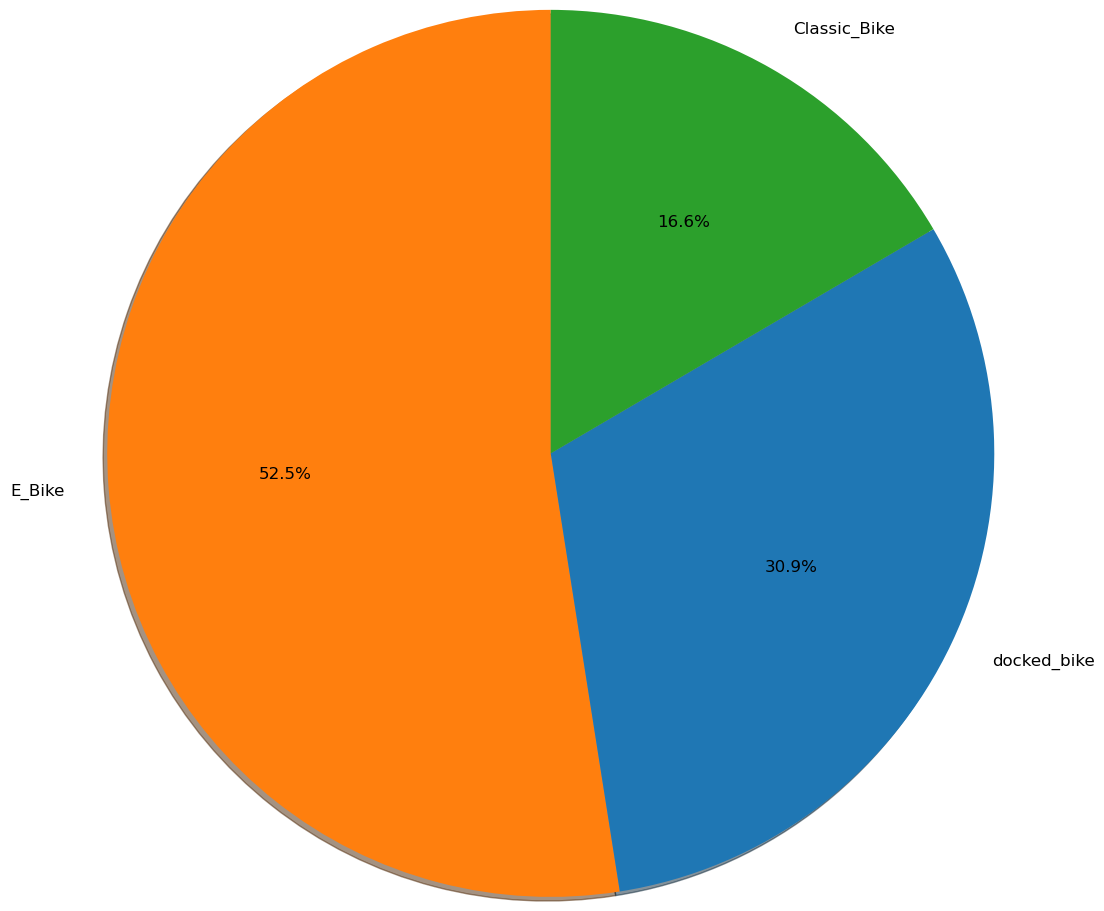

In [61]:
#Pie visualization was done for San Francisco data
fig, ax = plt.subplots()
ax.pie(x=sf_NumberOfBike["Number"], labels=sf_NumberOfBike["Type"], autopct="%1.1f%%", 
       shadow=True, startangle=90, textprops={"size": "large"}, radius=3, 
       colors=["#ff7f0e", "#1f77b4", "#2ca02c", "#d62728"])
plt.show()

This pie chart represents the distribution of three different bike types used in San Francisco, specifically E_Bike, Docked_Bike, and Classic_Bike. The proportions are displayed as percentages with the following key observations:

E_Bike occupies the largest share of the pie at 52.6%, indicating it is the most utilized type among the three.
Docked_Bike makes up 30.8% of the total, showing a significant but secondary usage.
Classic_Bike holds the smallest share at 16.6%, suggesting that this type is the least preferred or available among users.


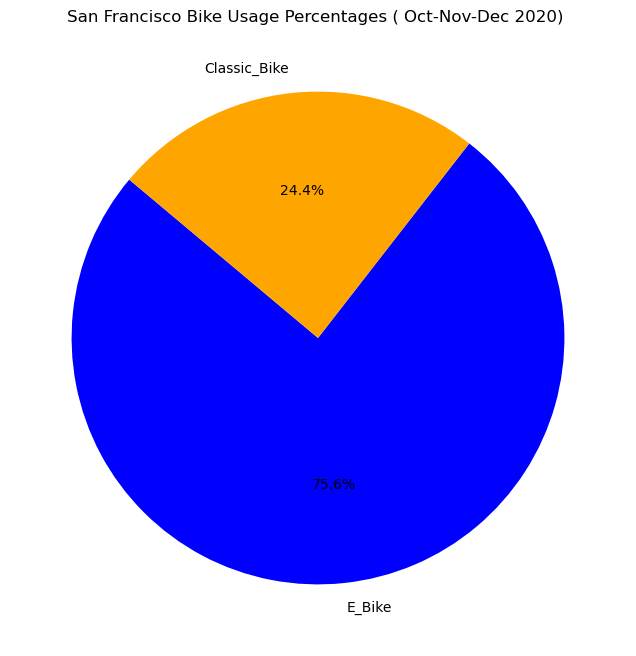

In [62]:
#Pie visualization was done for San Francisco data
import matplotlib.pyplot as plt
E_Bike = 15995
Classic_Bike = 5164
durations = [E_Bike, Classic_Bike]
labels = ['E_Bike', 'Classic_Bike']
colors = ['blue', 'orange']
plt.figure(figsize=(8, 8))
plt.pie(durations, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('San Francisco Bike Usage Percentages ( Oct-Nov-Dec 2020) ')
plt.show()

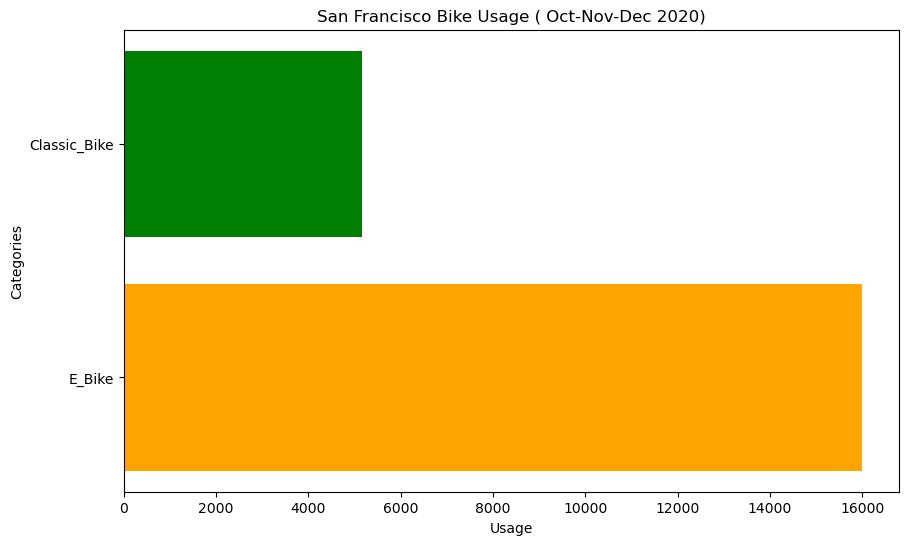

In [63]:
#Bar Chart visualization was done for San Francisco data
E_Bike = 15995
Classic_Bike = 5164

# Dataset
durations = [E_Bike, Classic_Bike]
labels = ['E_Bike', 'Classic_Bike']
colors = ['orange', 'green']

# Horizontal bar chart 
plt.figure(figsize=(10, 6))
plt.barh(labels, durations, color=colors)
plt.xlabel('Usage')
plt.ylabel('Categories')
plt.title('San Francisco Bike Usage ( Oct-Nov-Dec 2020)')
plt.show()

In [64]:
dub_NumberOfBike = dub_BikeDF['bike_type'].value_counts().reset_index()
dub_NumberOfBike.columns = ['Type', 'Number']

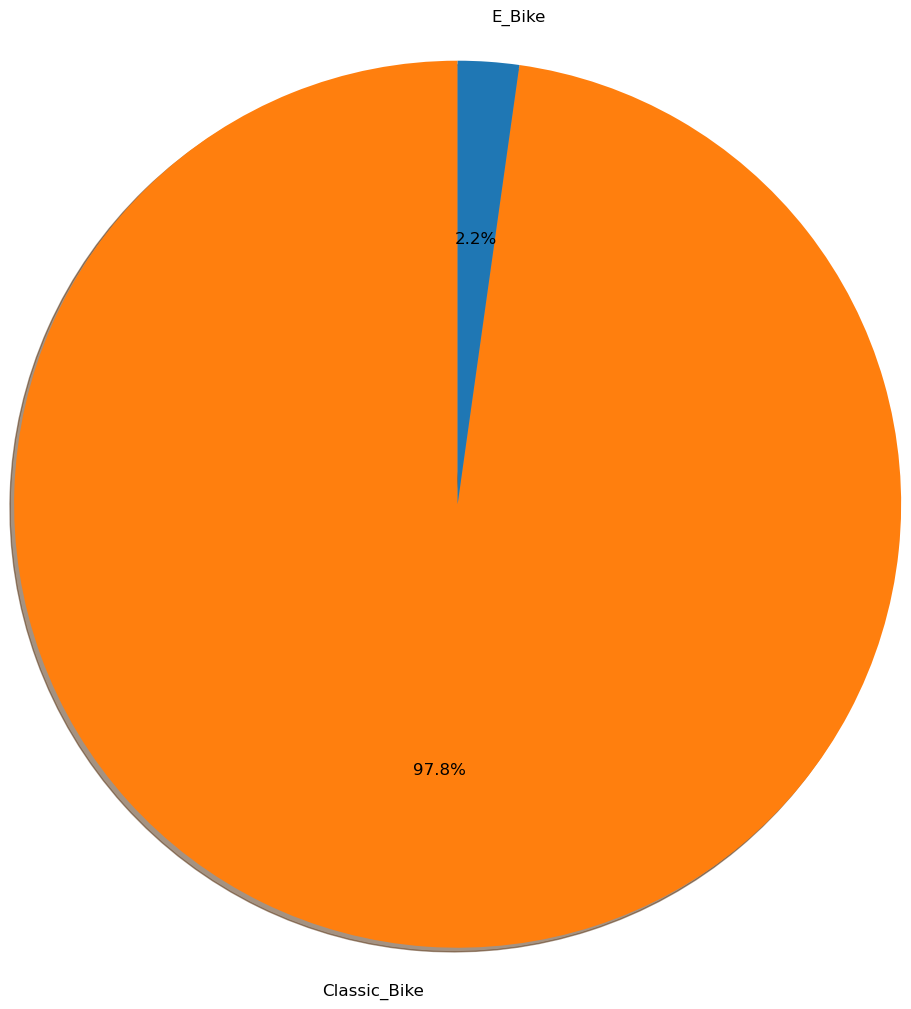

In [65]:
#Pie visualization was done for Dublin data
fig, ax = plt.subplots()
ax.pie(x=dub_NumberOfBike["Number"], 
       labels=dub_NumberOfBike["Type"], 
       autopct="%1.1f%%", 
       shadow=True, 
       startangle=90, 
       textprops={"size": "large"}, 
       radius=3, 
       colors=["#ff7f0e", "#1f77b4"]) # two colours are used
plt.show()

This pie chart visualizes the distribution of two bike types in Dublin, categorized as Classic_Bike and E_Bike. 
The vast majority of the chart, 97.6%, is occupied by Classic_Bike, shown in orange. This overwhelming share suggests that Classic_Bike is nearly the exclusive bike type in use or available in Dublin.
Its dominance leaves very little room for any other bike type.
E_Bike constitutes a mere 2.4% of the total, shown in blue. This small slice indicates that E_Bike has a negligible presence in the dataset compared to Classic_Bike.

In [66]:
dictNumberOfBikeType = {"Type": ["San Francisco Bike", "San Francisco E-Bike", "Dublin Bike", "Dublin E-Bike"], 
                           "Value": [sf_NumberOfBike["Number"][0], sf_NumberOfBike["Number"][1], dub_NumberOfBike["Number"][0], dub_NumberOfBike["Number"][1]]}
numberOfBikeTypeDF = pd.DataFrame(dictNumberOfBikeType)

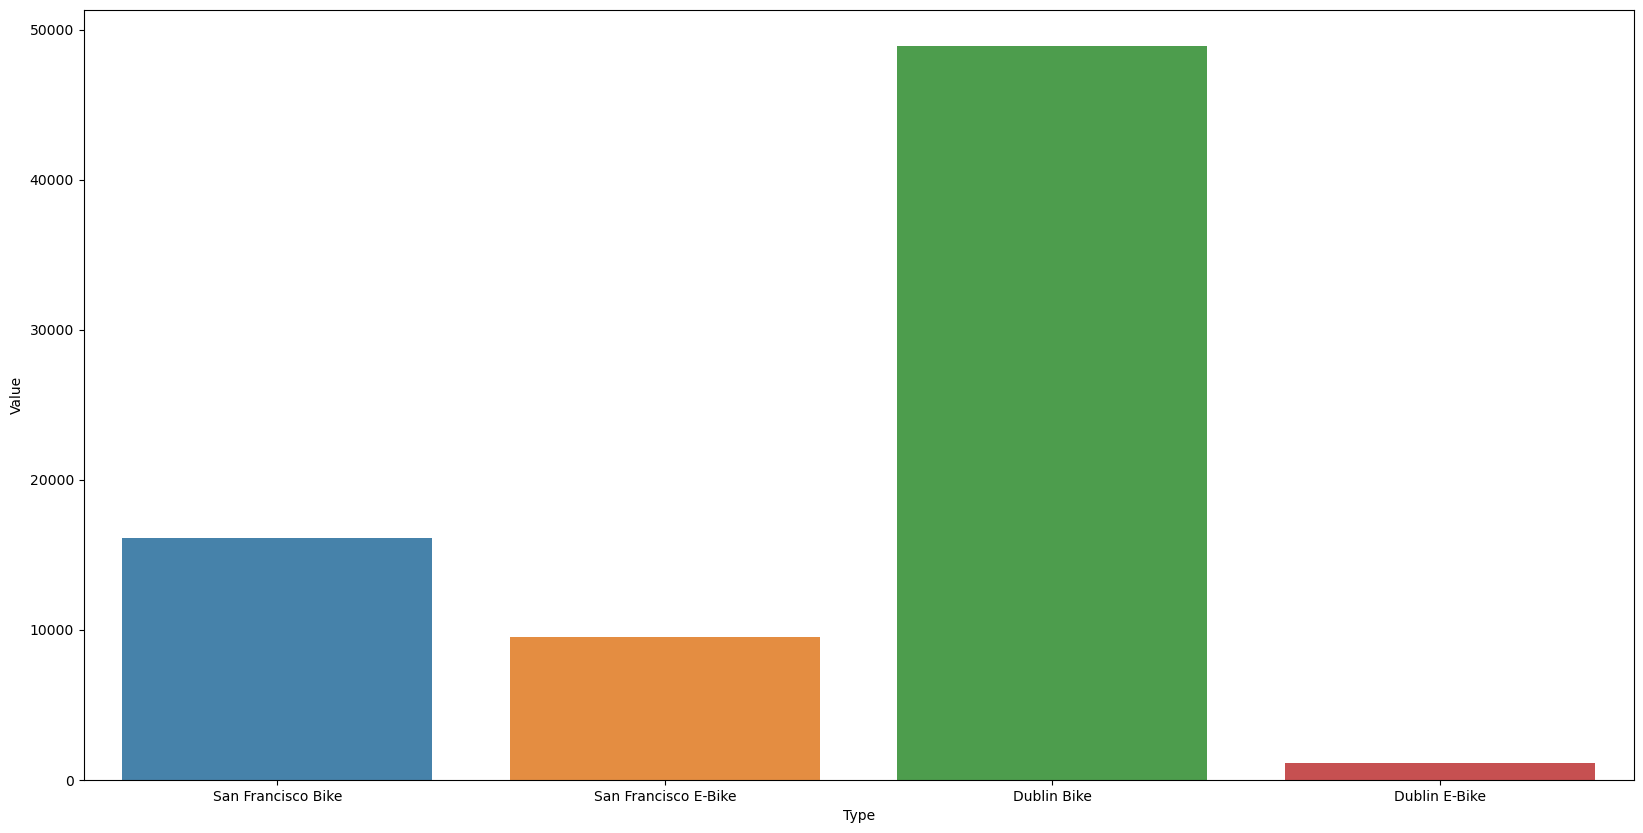

In [67]:
#Barplot visualization was done
fig = plt.figure(figsize=(20,10))
sns.barplot(x="Type", y="Value", data=numberOfBikeTypeDF, alpha=0.9);

This bar chart presents the distribution of bike usage two locations: San Francisco and Dublin, segmented by bike type (Bike and E-Bike). Here are the detailed insights:

The Dublin Bike category, shown in green, has an exceptionally high value, nearing 50,000. This is significantly larger than all other categories, indicating that Dublin has a predominant usage or availability of standard bikes compared to San Francisco.

For both cities, the E-Bike categories are minimal in comparison to the standard bike types:
San Francisco E-Bike (orange) has a modest representation, contributing less than half the count of standard bikes in San Francisco.
Dublin E-Bike (red) has a negligible value, almost imperceptible next to Dublin's standard bikes.

San Francisco's total bike count is substantially lower than Dublin’s, even when combining both bike types.
The bar for San Francisco Bike (blue) is notable but still lags far behind Dublin’s standard bikes.

In San Francisco, the Bike category clearly dominates over the E-Bike category, with E-Bikes making up a smaller fraction of the total.
In Dublin, the dominance of standard bikes is even more pronounced, with E-Bikes contributing a near-negligible proportion.

The overwhelming total bike count in Dublin compared to San Francisco raises questions about the underlying reasons—possibly due to differences in population, infrastructure, or cycling culture.
This chart effectively highlights the stark differences in bike type usage between the two cities and offers a foundation for further analysis into the factors driving these patterns.

## Bike Usage Durations

In [68]:
#Date and time columns converted to str format
sf_BikeDF['started_date'] = sf_BikeDF['started_date'].astype(str)
sf_BikeDF['started_time'] = sf_BikeDF['started_time'].astype(str)
sf_BikeDF['ended_date'] = sf_BikeDF['ended_date'].astype(str)
sf_BikeDF['ended_time'] = sf_BikeDF['ended_time'].astype(str)

#Converted to datetime format after combining date and time columns
sf_BikeDF['started_at'] = pd.to_datetime(sf_BikeDF['started_date'] + ' ' + sf_BikeDF['started_time'])
sf_BikeDF['ended_at'] = pd.to_datetime(sf_BikeDF['ended_date'] + ' ' + sf_BikeDF['ended_time'])

#Calculated time interval
sf_BikeDF['elapsed'] = sf_BikeDF['ended_at'] - sf_BikeDF['started_at']

#Set the time interval in seconds
sf_BikeDF['elapsed'] = sf_BikeDF['elapsed'].dt.total_seconds()

sf_BikeDF = sf_BikeDF[['ride_id', 'rideable_type', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'member_casual', 'started_at', 'ended_at', 'elapsed']]

In [69]:
#When the update was made, the summation process was performed using the uniqe method to avoid repeating values. The reason for applying uniqe to seconds is to minimize the margin of error
sf_elapsedSum = sf_BikeDF['elapsed'].unique().sum()

sf_bikeSec = int(sf_elapsedSum)
sf_bikeMin = int(sf_elapsedSum/60)
sf_bikeHour = int(sf_bikeMin/60)

In [70]:
#Date and time columns converted to str format
dub_BikeDF['started_date'] = dub_BikeDF['started_date'].astype(str)
dub_BikeDF['started_time'] = dub_BikeDF['started_time'].astype(str)
dub_BikeDF['ended_date'] = dub_BikeDF['ended_date'].astype(str)
dub_BikeDF['ended_time'] = dub_BikeDF['ended_time'].astype(str)

#Converted to datetime format after combining date and time columns
dub_BikeDF['started_at'] = pd.to_datetime(dub_BikeDF['started_date'] + ' ' + dub_BikeDF['started_time'])
dub_BikeDF['ended_at'] = pd.to_datetime(dub_BikeDF['ended_date'] + ' ' + dub_BikeDF['ended_time'])

#Calculated time interval
dub_BikeDF['elapsed'] = dub_BikeDF['ended_at'] - dub_BikeDF['started_at']

#Set the time interval in seconds
dub_BikeDF['elapsed'] = dub_BikeDF['elapsed'].dt.total_seconds()

dub_BikeDF = dub_BikeDF[['transaction_id', 'bike_type', 'started_at', 'ended_at', 'elapsed']]

In [71]:
#When the update was made, the summation process was performed using the uniqe method to avoid repeating values. The reason for applying uniqe to seconds is to minimize the margin of error
dub_elapsedSum = dub_BikeDF['elapsed'].unique().sum()

dub_bikeSec = int(dub_elapsedSum)
dub_bikeMin = int(dub_elapsedSum/60)
dub_bikeHour = int(dub_bikeMin/60)

In [72]:
#A new dataframe was created for the operations to be performed
timeData = {
    'Time': ["Second", "Minute", "Hour"],
    'San Francisco': [sf_bikeSec, sf_bikeMin, sf_bikeHour],
    'Dublin': [dub_bikeSec, dub_bikeMin, dub_bikeHour]
}
timeDF = pd.DataFrame(timeData)
#Data listed in dataframe
timeDF.style.background_gradient(axis=None, cmap="Blues")

,Time,San Francisco,Dublin
0,Second,24284635,4314435802
1,Minute,404743,71907263
2,Hour,6745,1198454


-------------------

In [73]:
#Library is added
import pandas as pd

# File Paths
filePaths = {
    "sf_BikeCsv102020": r"C:\Users\HP\Desktop\CA FILES\202010-baywheels-tripdata.csv",
    "sf_BikeCsv112020": r"C:\Users\HP\Desktop\CA FILES\202011-baywheels-tripdata.csv",
    "sf_BikeCsv122020": r"C:\Users\HP\Desktop\CA FILES\202012-baywheels-tripdata.csv",
}

# Csv file are read and values are collected .
rowCounts = {}

for name, filePath in filePaths.items():
    try:
        newDF = pd.read_csv(filePath)
        rowCounts[name] = newDF.shape[0]
    except Exception as e:
        print(f"No read: {filePath}. Error: {e}")

# Numbers are assigned
sf_BikeCsv102020Rows = rowCounts.get("sf_BikeCsv102020", 0)
sf_BikeCsv112020Rows = rowCounts.get("sf_BikeCsv112020", 0)
sf_BikeCsv122020Rows = rowCounts.get("sf_BikeCsv122020", 0)

# Results are showed
print("2020-10 Row Number:", sf_BikeCsv102020Rows)
print("2020-11 Row Number::", sf_BikeCsv112020Rows)
print("2020-12 Row Number::", sf_BikeCsv122020Rows)


2020-10 Row Number: 167541
2020-11 Row Number:: 133020
2020-12 Row Number:: 106422


In [74]:
#Library is added
import pandas as pd

# File Paths
filePaths = {
    "dub_BikeCsv102020": r"C:\Users\HP\Desktop\CA FILES\moby-bikes-historical-data-102020.csv",
    "dub_BikeCsv112020": r"C:\Users\HP\Desktop\CA FILES\moby-bikes-historical-data-112020.csv",
    "dub_BikeCsv122020": r"C:\Users\HP\Desktop\CA FILES\moby-bikes-historical-data-122020.csv",
}

# Csv file are read and values are collected 
rowCounts = {}

for name, filePath in filePaths.items():
    try:
        newDF = pd.read_csv(filePath)
        rowCounts[name] = newDF.shape[0]
    except Exception as e:
        print(f"No Read: {filePath}. Error: {e}")

# Numbers are assigned
dub_BikeCsv102020Rows = rowCounts.get("dub_BikeCsv102020", 0)
dub_BikeCsv112020Rows = rowCounts.get("dub_BikeCsv112020", 0)
dub_BikeCsv122020Rows = rowCounts.get("dub_BikeCsv122020", 0)

# Results are showed
print("2020-10 Row Number:", dub_BikeCsv102020Rows)
print("2020-11 Row Number:", dub_BikeCsv112020Rows)
print("2020-12 Row Number:", dub_BikeCsv122020Rows)

2020-10 Row Number: 122723
2020-11 Row Number: 117348
2020-12 Row Number: 123348


In [75]:
dictMonthYearData = {"Location": ["San Francisco", "Dublin", "San Francisco", "Dublin", "San Francisco", "Dublin", ], 
                            "Month": ["Oct 2020", "Oct 2020", "Nov 2020", "Nov 2020", "Dec 2020", "Dec 2020"], 
                            "Value": [sf_BikeCsv102020Rows, dub_BikeCsv102020Rows, sf_BikeCsv112020Rows, dub_BikeCsv112020Rows, sf_BikeCsv122020Rows, dub_BikeCsv122020Rows]}
#Data listed in dataframe
monthYearData = pd.DataFrame(dictMonthYearData)
monthYearData[['Month', 'Year']] = monthYearData['Month'].str.split(' ', expand=True)
monthYearData['MonthYear'] = monthYearData['Month'] + ' ' + monthYearData['Year'].astype(str)
monthYearData.style.background_gradient(axis=0, gmap=monthYearData["Value"], cmap="RdYlBu")

,Location,Month,Value,Year,MonthYear
0,San Francisco,Oct,167541,2020,Oct 2020
1,Dublin,Oct,122723,2020,Oct 2020
2,San Francisco,Nov,133020,2020,Nov 2020
3,Dublin,Nov,117348,2020,Nov 2020
4,San Francisco,Dec,106422,2020,Dec 2020
5,Dublin,Dec,123348,2020,Dec 2020


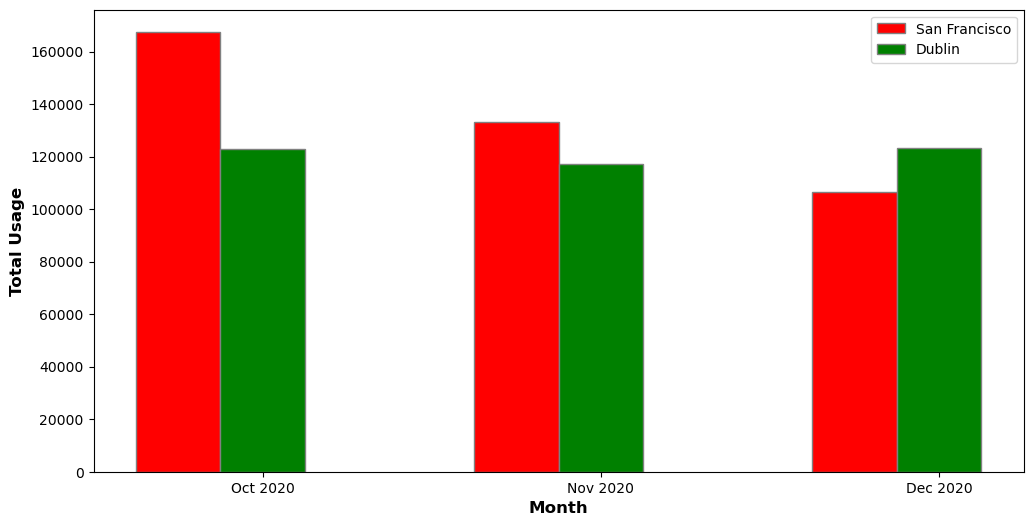

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Plotting
barWidth = 0.25
fig = plt.subplots(figsize =(12, 6))

# Adjusted the position of the bars on the X-axis
br1 = np.arange(len(monthYearData['Location'][monthYearData['Location'] == 'San Francisco'])) 
br2 = [x + barWidth for x in br1]

# Plot bars for San Francisco and Dublin
plt.bar(br1, monthYearData['Value'][monthYearData['Location'] == 'San Francisco'], color ='r', width = barWidth, edgecolor ='grey', label ='San Francisco') 
plt.bar(br2, monthYearData['Value'][monthYearData['Location'] == 'Dublin'], color ='g', width = barWidth, edgecolor ='grey', label ='Dublin')

# Set labels and title
plt.xlabel('Month', fontweight='bold', fontsize=12)
plt.ylabel('Total Usage', fontweight='bold', fontsize=12)
plt.xticks([r + barWidth for r in range(len(monthYearData['Location'][monthYearData['Location'] == 'San Francisco']))], monthYearData['MonthYear'][monthYearData['Location'] == 'San Francisco'])

# Show legend
plt.legend()
plt.show()

This bar chart presents the distribution of bike usage two locations: San Francisco and Dublin .
The Dublin Bike usage, shown in green, has an exceptionally high value, nearing 120,000. Only on December Dublin Bike usage is greater than San Francisco usage . Rest of months ,San Farncisco Bike usage , shown in red , has an exceptionally high value , minimum 130.000 and greater than Dublin Bike usage .
For both cities min usage is nearing 100.000 . 
On October there is a overwhelming difference between 2 cities . October is greatest usage for San Francisco .

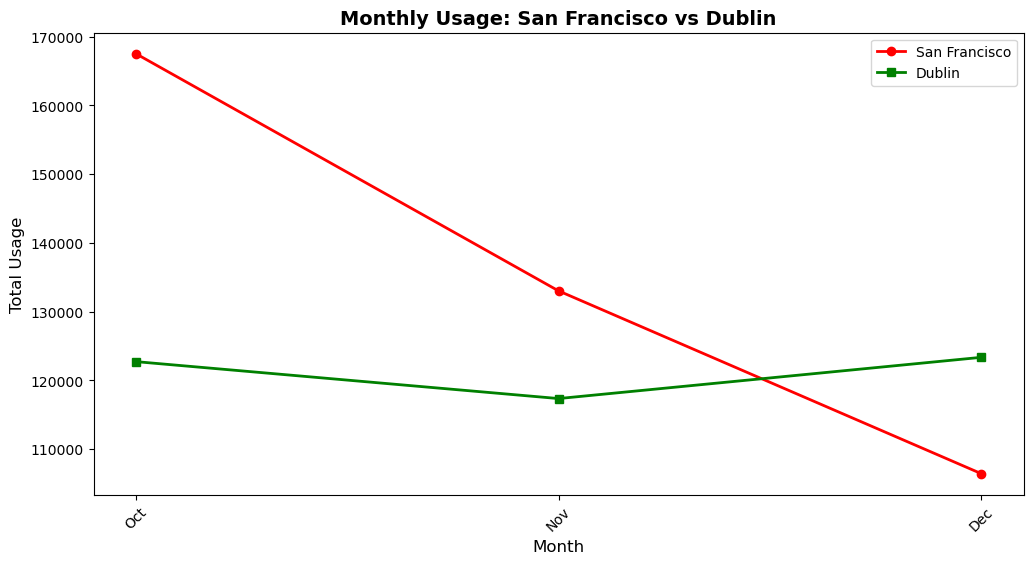

In [77]:
plt.figure(figsize=(12, 6))

# Line for San Francisco 
plt.plot(monthYearData['Month'][monthYearData['Location'] == 'San Francisco'], 
         monthYearData['Value'][monthYearData['Location'] == 'San Francisco'], 
         color='r', marker='o', label='San Francisco', linestyle='-', linewidth=2)

# Line for Dublin 
plt.plot(monthYearData['Month'][monthYearData['Location'] == 'Dublin'], 
         monthYearData['Value'][monthYearData['Location'] == 'Dublin'], 
         color='g', marker='s', label='Dublin', linestyle='-', linewidth=2)

# Headline and Labels are written
plt.title('Monthly Usage: San Francisco vs Dublin', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Usage', fontsize=12)
plt.xticks(rotation=45)  # Twisting on X line
plt.legend()

# Showing graph
plt.show()

The plot offers a more detailed view compared to the bar chart, making it easier to discuss the maximum and minimum values and providing a clearer understanding of the numbers.

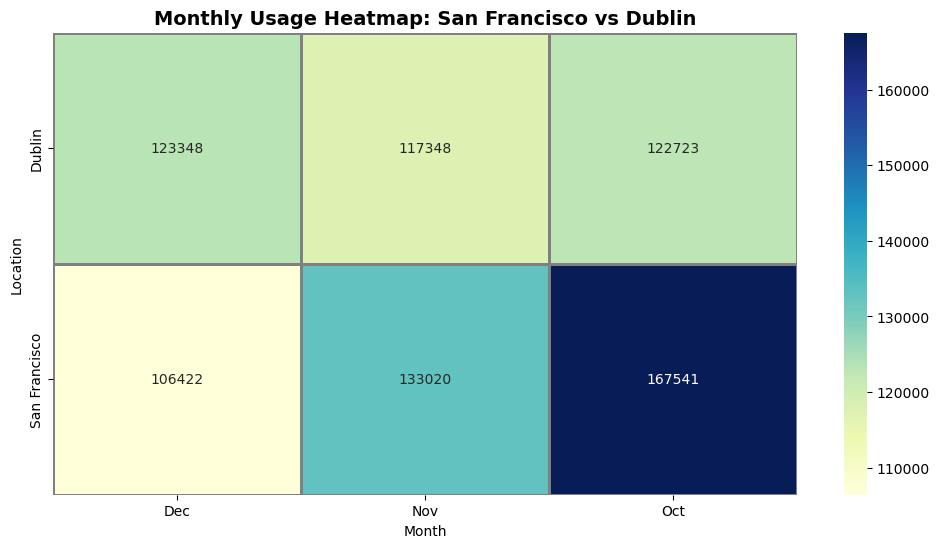

In [78]:
# Values are made pivot
heatmap_data = monthYearData.pivot("Location", "Month", "Value")

# Map of temperature
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt="d", linewidths=1, linecolor='gray')

# Headline
plt.title('Monthly Usage Heatmap: San Francisco vs Dublin', fontsize=14, fontweight='bold')

# Showing plot
plt.show()

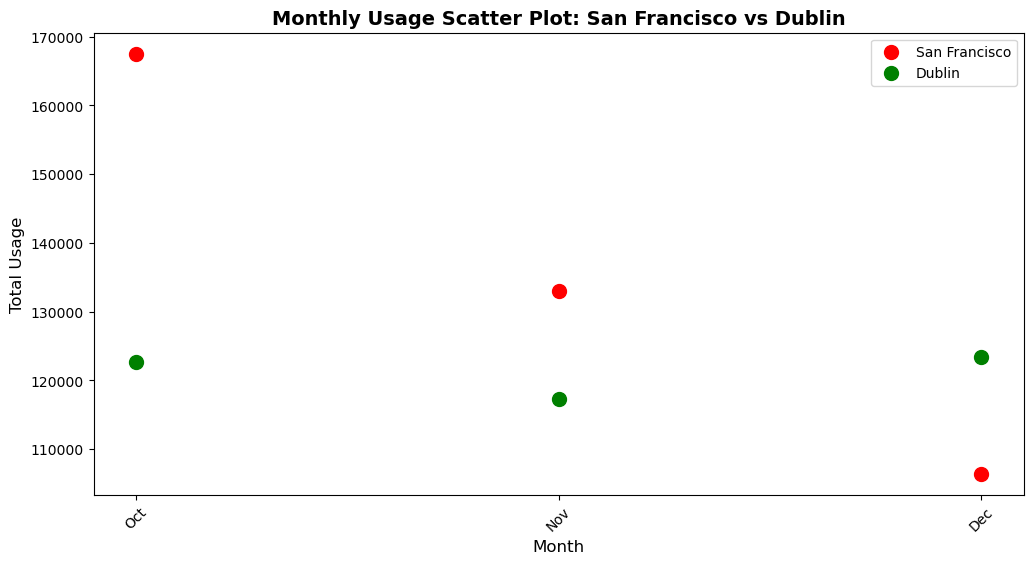

In [79]:
plt.figure(figsize=(12, 6))

# Points are created for San Francisco and Dublin 
plt.scatter(monthYearData['Month'][monthYearData['Location'] == 'San Francisco'], 
            monthYearData['Value'][monthYearData['Location'] == 'San Francisco'], 
            color='r', label='San Francisco', s=100)

plt.scatter(monthYearData['Month'][monthYearData['Location'] == 'Dublin'], 
            monthYearData['Value'][monthYearData['Location'] == 'Dublin'], 
            color='g', label='Dublin', s=100)

# Headline and Labels are created
plt.title('Monthly Usage Scatter Plot: San Francisco vs Dublin', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Usage', fontsize=12)
plt.xticks(rotation=45)

# Legend Added
plt.legend()

# Showing Graph
plt.show()

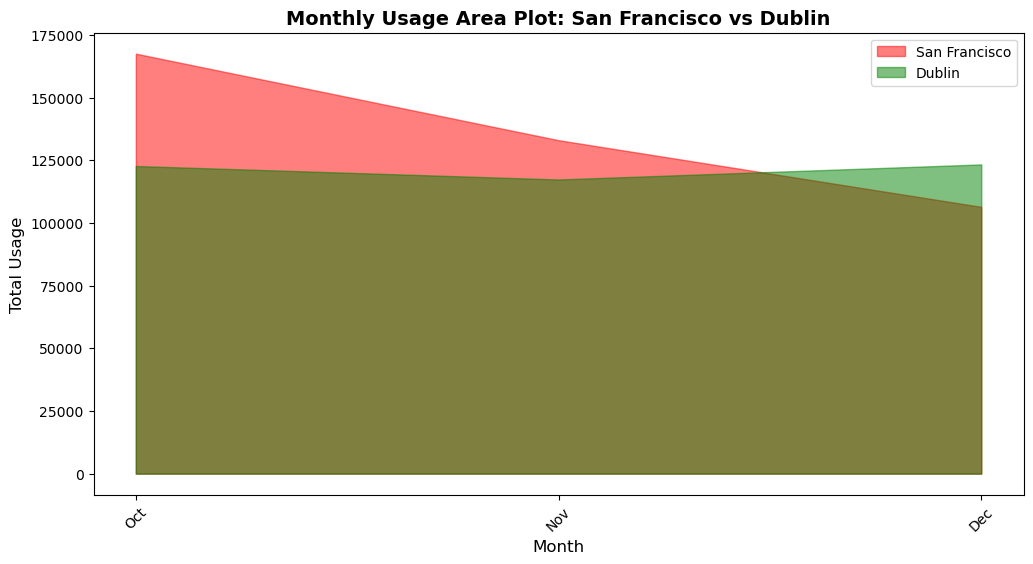

In [80]:
# Area Plot
plt.figure(figsize=(12, 6))

# Area plot is created to San Francisco and Dublin
plt.fill_between(monthYearData['Month'][monthYearData['Location'] == 'San Francisco'], 
                 monthYearData['Value'][monthYearData['Location'] == 'San Francisco'], 
                 color='r', alpha=0.5, label='San Francisco')
plt.fill_between(monthYearData['Month'][monthYearData['Location'] == 'Dublin'], 
                 monthYearData['Value'][monthYearData['Location'] == 'Dublin'], 
                 color='g', alpha=0.5, label='Dublin')

# Headline and Labels are created
plt.title('Monthly Usage Area Plot: San Francisco vs Dublin', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Usage', fontsize=12)
plt.xticks(rotation=45)

# Legend Added
plt.legend()

# Showing Graph
plt.show()

In [81]:
#Median mean and variance printed to screen
median(monthYearData["Value"])
mean(monthYearData["Value"])
variance(monthYearData["Value"])

Median: 123035.5
Mean: 128400.33333333333
Variance: 369382083.5555556


In [82]:
monthYearData

,Location,Month,Value,Year,MonthYear
0,San Francisco,Oct,167541,2020,Oct 2020
1,Dublin,Oct,122723,2020,Oct 2020
2,San Francisco,Nov,133020,2020,Nov 2020
3,Dublin,Nov,117348,2020,Nov 2020
4,San Francisco,Dec,106422,2020,Dec 2020
5,Dublin,Dec,123348,2020,Dec 2020


## To enhance the analysis using machine learning techniques and generate more meaningful values, the upcoming months (January, February, March) will be forecasted using statistical methods. Specifically, we will employ methods such as mean, mode, and linear trend analysis to estimate the data for these months. By applying these statistical techniques, we aim to provide a broader set of values, allowing for more accurate predictions and insights. The ultimate goal is to improve the detection and classification of X and Y test values, which will help in refining the predictive model and enhancing its performance. These methods will facilitate a deeper understanding of the data, ensuring that future values are generated more precisely, which will contribute to better decision-making and model testing.

In [83]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Dataset
monthYearData = pd.DataFrame({
    'Location': ['San Francisco', 'Dublin', 'San Francisco', 'Dublin', 'San Francisco', 'Dublin'],
    'Month': ['Oct', 'Oct', 'Nov', 'Nov', 'Dec', 'Dec'],
    'Value': [167541, 122723, 133020, 117348, 106422, 123348],
    'Year': [2020, 2020, 2020, 2020, 2020, 2020],
    'MonthYear': ['Oct 2020', 'Oct 2020', 'Nov 2020', 'Nov 2020', 'Dec 2020', 'Dec 2020'],
})

# 1. (Mean) Calculation
mean_sf = monthYearData[monthYearData['Location'] == 'San Francisco']['Value'].mean()
mean_dublin = monthYearData[monthYearData['Location'] == 'Dublin']['Value'].mean()

In [84]:
mean_sf , mean_dublin

(135661.0, 121139.66666666667)

In [85]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Dataset . January mean Dublin and Ssan Francisco Values are added 
monthYearData = pd.DataFrame({
    'Location': ['San Francisco', 'Dublin', 'San Francisco', 'Dublin', 'San Francisco', 'Dublin', 'San Francisco', 'Dublin' ],
    'Month': ['Oct', 'Oct', 'Nov', 'Nov', 'Dec', 'Dec' , ' Jan' , 'Jan'],
    'Value': [167541, 122723, 133020, 117348, 106422, 123348, 135661 , 121140 ],
    'Year': [2020, 2020, 2020, 2020, 2020, 2020 , 2021 , 2021 ],
    'MonthYear': ['Oct 2020', 'Oct 2020', 'Nov 2020', 'Nov 2020', 'Dec 2020', 'Dec 2020' , 'Jan 2021' , 'Jan 2021'],
})
# 2. (Median) Calculated
median_sf2021 = monthYearData[monthYearData['Location'] == 'San Francisco']['Value'].median()
median_dublin2021 = monthYearData[monthYearData['Location'] == 'Dublin']['Value'].median()

In [86]:
median_sf2021 , median_dublin2021

(134340.5, 121931.5)

In [87]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Dataset . February median Dublin and Ssan Francisco Values are added 
monthYearData = pd.DataFrame({
    'Location': ['San Francisco', 'Dublin', 'San Francisco', 'Dublin', 'San Francisco', 'Dublin', 'San Francisco', 'Dublin' , 'San Francisco', 'Dublin' ],
    'Month': ['Oct', 'Oct', 'Nov', 'Nov', 'Dec', 'Dec' , ' Jan' , 'Jan' , 'Feb' , 'Feb'],
    'Value': [167541, 122723, 133020, 117348, 106422, 123348, 135661 , 121140 , 134340 , 121931 ],
    'Year': [2020, 2020, 2020, 2020, 2020, 2020 , 2021 , 2021 , 2021 , 2021],
    'MonthYear': ['Oct 2020', 'Oct 2020', 'Nov 2020', 'Nov 2020', 'Dec 2020', 'Dec 2020' , 'Jan 2021' , 'Jan 2021' , 'Feb 2021 ' , 'Feb 2021 '],
})

# 3. Linear Trend Prediction
# Encode months to numerical values (Oct=1, Nov=2, Dec=3, etc.)
month_mapping = {'Oct': 1, 'Nov': 2, 'Dec': 3, 'Jan': 4, 'Feb': 5}
monthYearData['MonthNum'] = monthYearData['Month'].map(month_mapping)

# Linear Regression Model (San Francisco)
sf_data = monthYearData[monthYearData['Location'] == 'San Francisco']
X_sf = sf_data[['MonthNum']].values  # Bağımsız değişken (Ay numarası)
y_sf = sf_data['Value'].values  # Bağımlı değişken (Değer)

# NaN values are detected and wiped out
mask = ~np.isnan(X_sf).ravel() & ~np.isnan(y_sf)
X_sf = X_sf[mask]
y_sf = y_sf[mask]

sf_model = LinearRegression()
sf_model.fit(X_sf, y_sf)
oct_prediction_sf = sf_model.predict(np.array([[6]]))  # 6 is portreyed to March .

# Linear regression model (Dublin)
dublin_data = monthYearData[monthYearData['Location'] == 'Dublin']
X_dublin = dublin_data[['MonthNum']].values
y_dublin = dublin_data['Value'].values

# NaN values are detected and wiped out
mask = ~np.isnan(X_dublin).ravel() & ~np.isnan(y_dublin)
X_dublin = X_dublin[mask]
y_dublin = y_dublin[mask]

dublin_model = LinearRegression()
dublin_model.fit(X_dublin, y_dublin)
oct_prediction_dublin = dublin_model.predict(np.array([[6]]))  # 6 is portreyed to March .


In [88]:
print("Linear Regression Predictions (March 2021):")
print(f"San Francisco: {oct_prediction_sf[0]:.0f}")
print(f"Dublin: {oct_prediction_dublin[0]:.0f}")

Linear Regression Predictions (March 2021):
San Francisco: 111525
Dublin: 121960


In [89]:
# Dataset is fixed . March values are added 
monthYearData = pd.DataFrame({
    'Location': ['San Francisco', 'Dublin', 'San Francisco', 'Dublin', 'San Francisco', 'Dublin', 'San Francisco', 'Dublin' , 'San Francisco', 'Dublin' , 'San Francisco', 'Dublin' ],
    'Month': ['Oct', 'Oct', 'Nov', 'Nov', 'Dec', 'Dec' , ' Jan' , 'Jan' , 'Feb' , 'Feb' , 'Mar' , 'Mar'],
    'Value': [167541, 122723, 133020, 117348, 106422, 123348, 135661 , 121140 , 134340 , 121931 , 111525 , 121960 ],
    'Year': [2020, 2020, 2020, 2020, 2020, 2020 , 2021 , 2021 , 2021 , 2021, 2021 , 2021],
    'MonthYear': ['Oct 2020', 'Oct 2020', 'Nov 2020', 'Nov 2020', 'Dec 2020', 'Dec 2020' , 'Jan 2021' , 'Jan 2021' , 'Feb 2021 ' , 'Feb 2021 ' , 'Mar 2021', 'Mar 2021'],
})

In [90]:
monthYearData #new dataset is displayed

,Location,Month,Value,Year,MonthYear
0,San Francisco,Oct,167541,2020,Oct 2020
1,Dublin,Oct,122723,2020,Oct 2020
2,San Francisco,Nov,133020,2020,Nov 2020
3,Dublin,Nov,117348,2020,Nov 2020
4,San Francisco,Dec,106422,2020,Dec 2020
5,Dublin,Dec,123348,2020,Dec 2020
6,San Francisco,Jan,135661,2021,Jan 2021
7,Dublin,Jan,121140,2021,Jan 2021
8,San Francisco,Feb,134340,2021,Feb 2021
9,Dublin,Feb,121931,2021,Feb 2021


In [91]:
#Above Average Values has been created and values below the average are labeled as 0 and those above the average are labeled as 1
monthYearData["Above Average Values"] = 0
for i in range(6):
    if monthYearData["Value"][i] > np.mean(monthYearData["Value"]):
        monthYearData["Above Average Values"][i] = "1"
    else:
        monthYearData["Above Average Values"][i] = "0"
        
monthYearData

,Location,Month,Value,Year,MonthYear,Above Average Values
0,San Francisco,Oct,167541,2020,Oct 2020,1
1,Dublin,Oct,122723,2020,Oct 2020,0
2,San Francisco,Nov,133020,2020,Nov 2020,1
3,Dublin,Nov,117348,2020,Nov 2020,0
4,San Francisco,Dec,106422,2020,Dec 2020,0
5,Dublin,Dec,123348,2020,Dec 2020,0
6,San Francisco,Jan,135661,2021,Jan 2021,0
7,Dublin,Jan,121140,2021,Jan 2021,0
8,San Francisco,Feb,134340,2021,Feb 2021,0
9,Dublin,Feb,121931,2021,Feb 2021,0


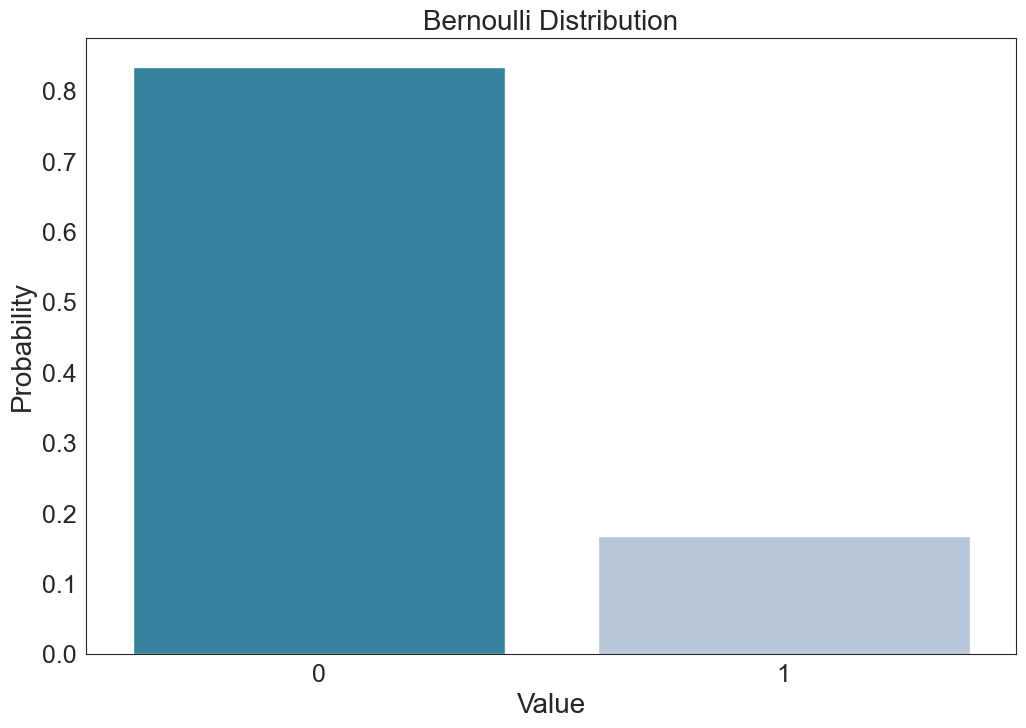

In [92]:
#Bernoulli distribution
monthYearData["Above Average Values"].unique()
monthYearData["Above Average Values"] = monthYearData["Above Average Values"].astype(int)
sns.set_style("white")
fig,ax=plt.subplots(figsize=(12,8))
probabilities=monthYearData["Above Average Values"].value_counts(normalize=True)
ax=sns.barplot(x=probabilities.index, y=probabilities.values, palette="PuBuGn_r")
patches=ax.patches
label_graph(18,"Value","Probability","Bernoulli Distribution", 20)

The result showing 80% '0' and 20% '1' in the plot likely reflects the distribution of the "Above Average Values" in your dataset.
'0' (80%): This value represents the majority of the data. Since '0' corresponds to "below average" values (as implied by the name "Above Average Values"), it suggests that 80% of the observations in your dataset are below average based on whatever metric you're using to determine "above" or "below" average. This could mean that most of the data points fall below the threshold or reference value that determines whether a value is considered "above average."

'1' (20%): The value '1' represents "above average" values. Since 20% of the observations are above average, it suggests that a smaller portion of the data points meet the criteria for being above average. This might indicate that the threshold or the metric for "above average" is relatively high, and only a fifth of your data surpasses it.

This distribution might reflect a few things:
Skewed Data: Your data is skewed towards below-average values, with a small proportion of the values meeting the "above average" criteria. This could be due to a variety of factors, such as the nature of the data, the way "average" is calculated, or the presence of extreme values (outliers) that are influencing the threshold.

Threshold Interpretation: The "average" value you're using to classify the data as above or below average could be relatively high compared to most of your data points. This suggests that most values fall below this threshold, and only a smaller percentage of the data exceed it.

Modeling or Classification Insight: If you’re using this distribution in a predictive model, it could help in understanding the imbalance between "above average" and "below average" values. For example, models might be biased toward predicting '0' (below average) more often due to the higher prevalence of this class. Techniques like resampling or weighting can be used to balance the impact of the two classes if necessary.

In summary, an 80% '0' and 20% '1' distribution means that the majority of your data points are below the average threshold you've set, while a smaller portion is above average. This is typical for datasets where the majority of values are centered around a lower range.

[0.01940841 0.09057258]


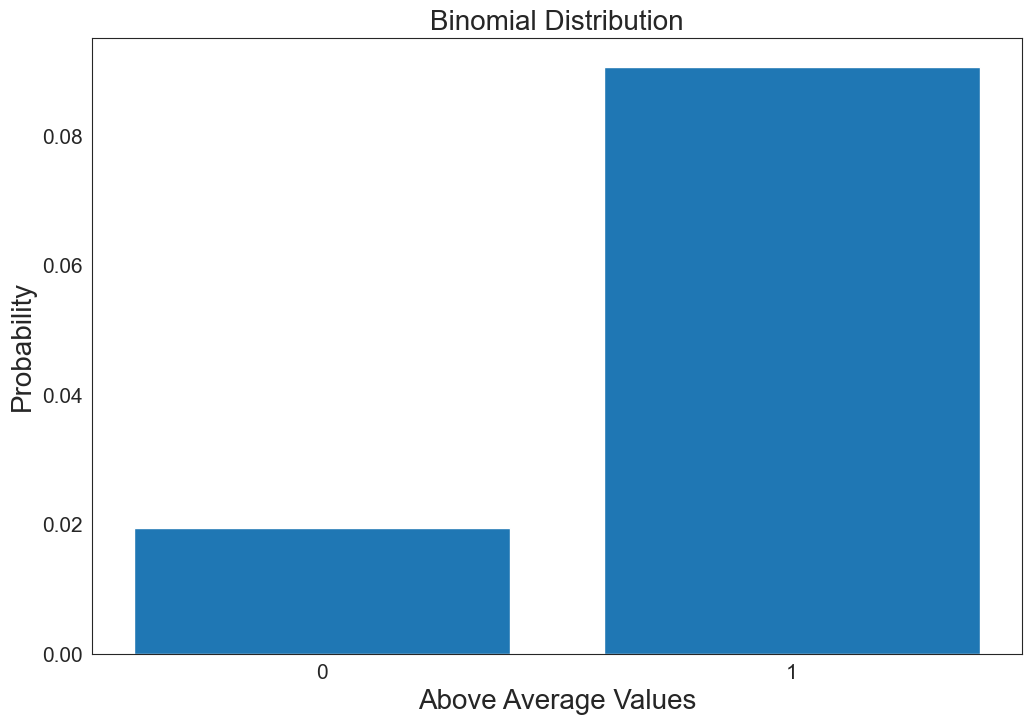

In [93]:
#Binomial distribution
aboveAvarageValues=monthYearData[monthYearData["Above Average Values"]== 1]
aboveAvarageValues["Value"].value_counts(normalize=True)
n=12
p=0.28
x=np.arange(0,2)
fig,ax=plt.subplots(figsize=(12,8))
pmf=stats.binom.pmf(x,n,p)
pps=plt.bar(x,pmf)
print(pmf)
plt.locator_params(integer=True)
label_graph(15,"Above Average Values", "Probability", "Binomial Distribution",20)


A binomial distribution is used to model situations where there are two possible outcomes (e.g., success or failure) in a fixed number of trials. Each trial is independent, and the probability of success is the same for each trial. It is defined by:

n = the number of trials
p = the probability of success on a single trial
(1 - p) = the probability of failure on a single trial
Interpreting 80% '1' and 20% '0'
In your case:

80% '1': This represents the "success" outcome, meaning that 80% of the data points fall into the "success" category. It indicates that in most cases, the event being measured is successful.
20% '0': This represents the "failure" outcome, meaning that 20% of the data points fall into the "failure" category. This suggests that in a smaller proportion of cases, the event does not succeed.

Probability of Success (p): The success rate (represented by '1') is 80%, meaning that the event has an 80% chance of being successful.
Probability of Failure (1 - p): The failure rate (represented by '0') is 20%, meaning there is a 20% chance that the event will not be successful.
In the context of a binomial distribution, you would expect 80% of the trials to be successful and 20% to fail, assuming the probability of success remains constant for each trial.
80% '1' and 20% '0' means that the probability of success is high (80%), and the probability of failure is low (20%).
The distribution is binomial because there are two possible outcomes (success or failure), and it follows a fixed probability of success across trials.

----------

In [94]:
monthYearData = monthYearData.drop(columns='Above Average Values')

In [95]:
monthYearData

,Location,Month,Value,Year,MonthYear
0,San Francisco,Oct,167541,2020,Oct 2020
1,Dublin,Oct,122723,2020,Oct 2020
2,San Francisco,Nov,133020,2020,Nov 2020
3,Dublin,Nov,117348,2020,Nov 2020
4,San Francisco,Dec,106422,2020,Dec 2020
5,Dublin,Dec,123348,2020,Dec 2020
6,San Francisco,Jan,135661,2021,Jan 2021
7,Dublin,Jan,121140,2021,Jan 2021
8,San Francisco,Feb,134340,2021,Feb 2021
9,Dublin,Feb,121931,2021,Feb 2021


In [96]:
monthYearData.dtypes

Location     object
Month        object
Value         int64
Year          int64
MonthYear    object
dtype: object

In [97]:
#Label encoder was applied to the selected columns
columnLabelEncode = ["Location", "Month", "Year", "MonthYear"]
labelEncoder = LabelEncoder()
for column in columnLabelEncode:
    monthYearData[column] = labelEncoder.fit_transform(monthYearData[column])

In [98]:
monthYearData.dtypes

Location     int32
Month        int32
Value        int64
Year         int64
MonthYear    int32
dtype: object

In [99]:
#After the label encoder was made, the describe function was applied to the dataframe
monthYearData.describe()

,Location,Month,Value,Year,MonthYear
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.500000,3.250000,126413.250000,0.500000,2.500000
std,0.522233,2.050499,15602.234404,0.522233,1.783765
min,0.000000,0.000000,106422.000000,0.000000,0.000000
25%,0.000000,1.750000,120192.000000,0.000000,1.000000
50%,0.500000,3.500000,122341.500000,0.500000,2.500000
75%,1.000000,5.000000,133350.000000,1.000000,4.000000
max,1.000000,6.000000,167541.000000,1.000000,5.000000


In [100]:
#For processing the columns were divided into x and y
X = monthYearData.drop("Location", axis = 1)
print(X)
y = monthYearData.Year.values.astype(int)
print(y)

    Month   Value  Year  MonthYear
0       6  167541     0          5
1       6  122723     0          5
2       5  133020     0          4
3       5  117348     0          4
4       1  106422     0          0
5       1  123348     0          0
6       0  135661     1          2
7       3  121140     1          2
8       2  134340     1          1
9       2  121931     1          1
10      4  111525     1          3
11      4  121960     1          3
[0 0 0 0 0 0 1 1 1 1 1 1]


In [101]:
#Each column was standardized and divided into two as train and test
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
print(y_train.mean())
print(y_test.mean())

0.5
0.5


The result showing 0.5 for both y_train.mean() and y_test.mean() means that the average (mean) value of the target variable y is 50% for both the training and testing sets. 

y_train.mean() = 0.5: This indicates that in the training dataset (X_train and y_train), 50% of the target values (y_train) are 1, and the remaining 50% are 0. Essentially, the target variable is evenly split between the two classes (if it's a binary classification problem).

y_test.mean() = 0.5: Similarly, in the test dataset (X_test and y_test), 50% of the target values (y_test) are 1, and 50% are 0. The test set has the same class distribution as the training set.

The fact that the mean is 0.5 suggests that your dataset is balanced. This means that there is an equal number of instances of both classes (0 and 1) in your target variable y. This is a good thing in many cases because imbalanced datasets (where one class is much more frequent than the other) can cause models to be biased towards predicting the more common class.

The target variable is binary (0 and 1), and you get a mean of 0.5, it suggests that your dataset is perfectly balanced with an equal distribution of the two classes.

In [102]:
#SVC object created. C = 1 received. Model trained and prediction made
model = SVC(C = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [103]:
#Confusion matrix was used
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[2, 0],
       [0, 2]], dtype=int64)

In [104]:
#Accuracy, Precision Score, Recall Score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred, pos_label="positive", average="micro"))
print("Recall Score:",recall_score(y_test, y_pred, pos_label="positive", average="micro"))

Accuracy: 1.0
Precision Score: 1.0
Recall Score: 1.0


In [105]:
#Created a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
model = SVC(C = 1)

In [106]:
#Computed the cross-validation scores. Printed 5 accuracies obtained from the 5 folds
cv_results = cross_val_score(model, X_train, y_train, cv = folds, scoring = "accuracy") 
print(cv_results)
print("Mean Accuracy = {}".format(cv_results.mean()))

[1.  1.  0.5 1.  1. ]
Mean Accuracy = 0.9


In [107]:
#Specified range of parameters (C) as a list and set up grid search scheme
params = {"C": [0.1, 1, 10, 100, 1000]}
model = SVC()
model_cv = GridSearchCV(estimator = model, param_grid = params, scoring= "accuracy", cv = folds, verbose = 1, return_train_score=True)      

In [108]:
#Model trained and results printed on screen
model_cv.fit(X_train, y_train)  
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003124,0.006249,0.000000,0.000000,0.1,{'C': 0.1},1.0,1.0,0.0,0.0,...,0.4,0.489898,5,1.0,1.0,0.666667,0.571429,0.571429,0.761905,0.19749
1,0.000000,0.000000,0.003125,0.006250,1,{'C': 1},1.0,1.0,0.5,1.0,...,0.9,0.200000,1,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.00000
2,0.003125,0.006250,0.000000,0.000000,10,{'C': 10},1.0,1.0,0.5,1.0,...,0.9,0.200000,1,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.00000
3,0.003125,0.006250,0.003125,0.006250,100,{'C': 100},1.0,1.0,0.5,1.0,...,0.9,0.200000,1,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.00000
4,0.003124,0.006249,0.006250,0.007654,1000,{'C': 1000},1.0,1.0,0.5,1.0,...,0.9,0.200000,1,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.00000


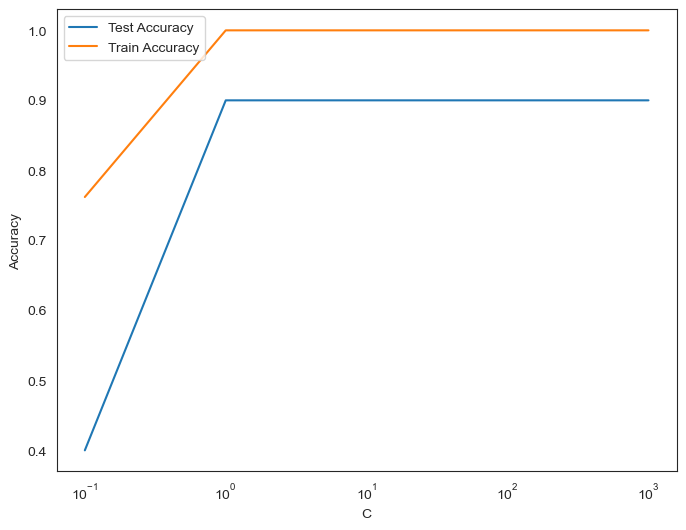

In [109]:
#Plot of C versus train and test scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results["param_C"], cv_results["mean_test_score"])
plt.plot(cv_results["param_C"], cv_results["mean_train_score"])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend(["Test Accuracy", "Train Accuracy"], loc="upper left")
plt.xscale("log")

In [110]:
#The highest test accuracy printed on the screen
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.9 at C = 1


In [111]:
#The model with the best C value was trained and made predictions
model = SVC(C=best_C)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [112]:
#Accuracy, Precision Score, Recall Score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred, pos_label="positive", average="micro"))
print("Recall Score:",recall_score(y_test, y_pred, pos_label="positive", average="micro"))

Accuracy: 1.0
Precision Score: 1.0
Recall Score: 1.0


In [113]:
#Standard scaler object created.
scalar = StandardScaler()
scalar.fit(monthYearData)
scaled_data = scalar.transform(monthYearData)
scaled_data

array([[ 1.        ,  1.40077199,  2.75322962, -1.        ,  1.46385011],
       [-1.        ,  1.40077199, -0.24703772, -1.        ,  1.46385011],
       [ 1.        ,  0.89140036,  0.44227802, -1.        ,  0.87831007],
       [-1.        ,  0.89140036, -0.60685826, -1.        ,  0.87831007],
       [ 1.        , -1.14608617, -1.33828137, -1.        , -1.46385011],
       [-1.        , -1.14608617, -0.20519812, -1.        , -1.46385011],
       [ 1.        , -1.6554578 ,  0.61907542,  1.        , -0.29277002],
       [-1.        , -0.12734291, -0.35300905,  1.        , -0.29277002],
       [ 1.        , -0.63671454,  0.53064325,  1.        , -0.87831007],
       [-1.        , -0.63671454, -0.30005686,  1.        , -0.87831007],
       [ 1.        ,  0.38202872, -0.99666942,  1.        ,  0.29277002],
       [-1.        ,  0.38202872, -0.2981155 ,  1.        ,  0.29277002]])

In [114]:
#PCA = 2 received
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(12, 2)

Text(0, 0.5, 'Second Principal Component')

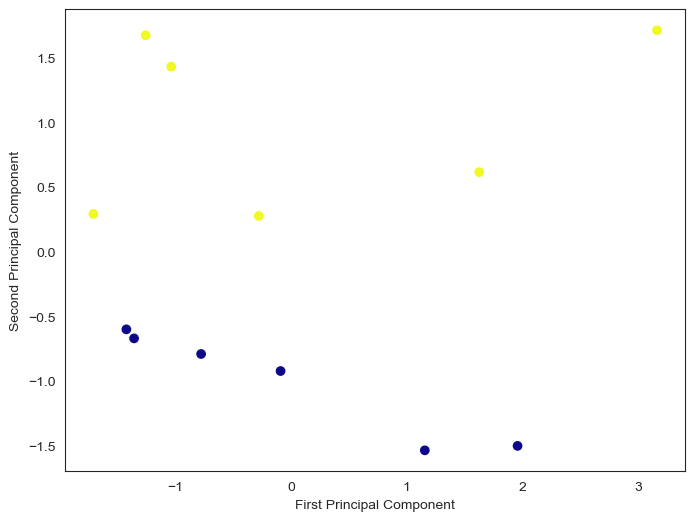

In [115]:
#Visualized with scatter
plt.figure(figsize = (8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = monthYearData["Location"], cmap ="plasma")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

In [116]:
monthYearData

,Location,Month,Value,Year,MonthYear
0,1,6,167541,0,5
1,0,6,122723,0,5
2,1,5,133020,0,4
3,0,5,117348,0,4
4,1,1,106422,0,0
5,0,1,123348,0,0
6,1,0,135661,1,2
7,0,3,121140,1,2
8,1,2,134340,1,1
9,0,2,121931,1,1


In [117]:
#The algorithms were enabled to predict the entered data 
x = monthYearData.iloc[:,[1,2,3,4]]
y = monthYearData.iloc[:,0]
X = x.values
Y = y.values
enterData = [1,111525,1,3] # ->1

In [118]:
#Data split for training and testing. It was later scaled
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)
X_train = scalar.fit_transform(x_train)
X_test = scalar.transform(x_test)

In [119]:
#Logistic Regression Classifier and Confusion Matrix
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test) 
cm = confusion_matrix(y_test,y_pred)
print("Logistic Regression Classifier")
print("Forecasting with data entry:",logr.predict([enterData]))
print(cm)
accuracyLOG = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:")
print(accuracyLOG)

Logistic Regression Classifier
Forecasting with data entry: [1]
[[1 0]
 [3 0]]
Accuracy:
0.25


In [120]:
#K-Nearest Neighbors Classifier (KNN) and Confusion Matrix
knn = KNeighborsClassifier(n_neighbors=1, metric="minkowski")
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("K-Nearest Neighbors Classifier")
print("Forecasting with data entry:",knn.predict([enterData]))
print(cm)
accuracyKNN = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:")
print(accuracyKNN)

K-Nearest Neighbors Classifier
Forecasting with data entry: [1]
[[1 0]
 [2 1]]
Accuracy:
0.5


In [121]:
#Support Vector Machine Classifier (SVC) and Confusion Matrix
svc = SVC(kernel="poly")
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Support Vector Machine Classifier")
print("Forecasting with data entry:",svc.predict([enterData]))
print(cm)
accuracySVC = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:")
print(accuracySVC)

Support Vector Machine Classifier
Forecasting with data entry: [1]
[[1 0]
 [3 0]]
Accuracy:
0.25


In [122]:
#Naive Bayes Classifier and Confusion Matrix
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Naive Bayes Classifier")
print("Forecasting with data entry:",gnb.predict([enterData]))
print(cm)
accuracyNB = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:")
print(accuracyNB)

Naive Bayes Classifier
Forecasting with data entry: [1]
[[1 0]
 [0 3]]
Accuracy:
1.0


In [123]:
#Decision Tree Classifier and Confusion Matrix
dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Decision Tree Classifier")
print("Forecasting with data entry:",dtc.predict([enterData]))
print(cm)
accuracyDT = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:")
print(accuracyDT)

Decision Tree Classifier
Forecasting with data entry: [1]
[[1 0]
 [2 1]]
Accuracy:
0.5


In [124]:
#Random Forest Classifier and Confusion Matrix
rfc = RandomForestClassifier(n_estimators=10, criterion = "entropy")
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Random Forest Classifier")
print("Forecasting with data entry:",rfc.predict([enterData]))
print(cm)
accuracyRF = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:")
print(accuracyRF)

Random Forest Classifier
Forecasting with data entry: [1]
[[1 0]
 [2 1]]
Accuracy:
0.5


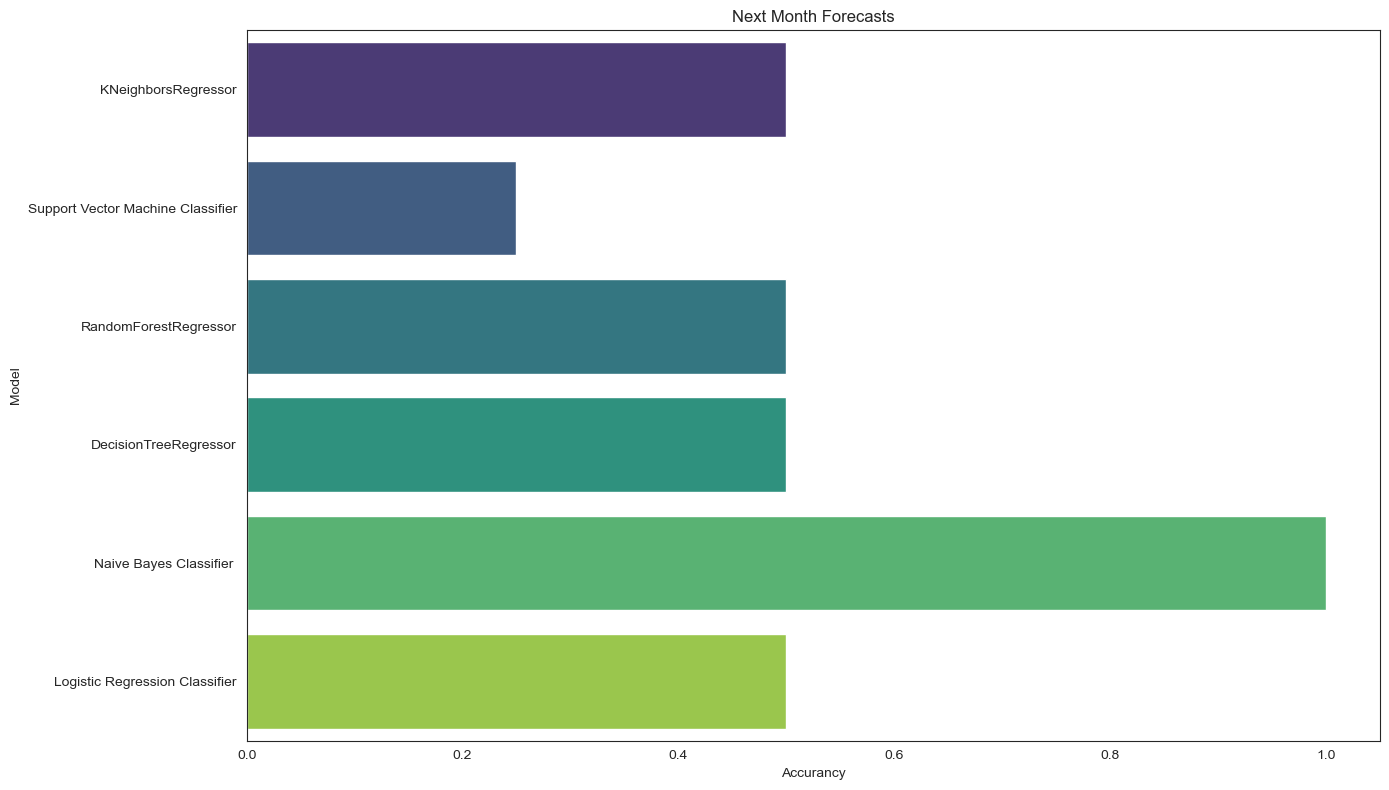

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define model results
models = [
    'KNeighborsRegressor',
    'Support Vector Machine Classifier',
    'RandomForestRegressor',
    'DecisionTreeRegressor',
    'Naive Bayes Classifier ' ,
    'Logistic Regression Classifier'
]

accurancy = [
    0.5,
    0.25,
    0.5,
    0.5,
    1 ,
    0.5
]

# Create DataFrame
results_df = pd.DataFrame({
    'Model': models,
    'Forecast': accurancy
})

# Create plot
fig, ax = plt.subplots(figsize=(14, 8))  # Fixed subplot configuration, (1, figsize) is incorrect

# Forecast Plot
sns.barplot(x='Forecast', y='Model', data=results_df, ax=ax, palette='viridis')  # ax[1] is incorrect; should be ax
ax.set_title('Next Month Forecasts')  # Updated ax[1] to ax
ax.set_xlabel('Accurancy')  # Updated ax[1] to ax
ax.set_ylabel('Model')  # Updated ax[1] to ax

# Adjust layout
plt.tight_layout()
plt.show()


The accuracy rates are mainly 0.25, 0.5, and 1.0, which raises some interesting points.
Naive Bayes Classifier has achieved 100% accuracy, which is unusual and may indicate potential issues like data leakage or overfitting. Dataset was scaled by StandardScaler before .
Support Vector Machine Classifier (SVM) has the lowest accuracy of 25%, suggesting the model might require better data preprocessing, scaling, or hyperparameter tuning.